<a href="https://colab.research.google.com/github/raunakkbanerjee/statistical-significance-of-offline-rl/blob/cluster_branch/Inference_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.8/218.8 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=12ae7f329e5a47d6ea55cc13beb9cdcdeaf81b78683a553c5cda8db0fbad65dd
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
import scipy.stats as stats
import os
import pandas as pd
import wandb
%matplotlib inline

In [ ]:
tasks=["hopper-medium-v2", "walker2d-medium-v2", "halfcheetah-medium-v2", "ant-medium-v2", "hopper-medium-expert-v2", "walker2d-medium-expert-v2", "halfcheetah-medium-expert-v2", "ant-medium-expert-v2", "    hopper-medium-replay-v2", "walker2d-medium-replay-v2", "halfcheetah-medium-replay-v2", "ant-medium-replay-v2"]
#tasks=("pen-cloned-v1" "hammer-cloned-v1" "door-cloned-v1" "relocate-cloned-v1" "antmaze-umaze-diverse-v2")
algos=["CQL", "IQL"]

In [ ]:
directory = "/content"  # Replace with your directory path
path_list = []
# Iterate over each file in the directory
for filename in os.listdir(directory):
    # Check if the file is a text file
    if filename.endswith(".txt") and ('rollout' in filename):
        # Get the full path of the file
        file_path = os.path.join('./', filename)
        path_list.append(file_path)

path_list = sorted(path_list)

def read_text(file_path):
    # List to store the extracted values
    values = []

    # Read the file line by line
    with open(file_path, 'r') as file:
        for line in file:
            # Extract the numeric value from each line (assuming a single numeric value per line)
            try:
                value = float(line.strip())
                values.append(value)
            except ValueError:
                # Skip lines that don't contain a valid numeric value
                if len(values) != 0:
                    num_elements_to_add = (1000 - len(values) % 1000)%1000
                    # if num_elements_to_add!=0:
                    nums_to_add = np.random.choice(values[(len(values)//1000)*1000:], num_elements_to_add)
                    for num in nums_to_add:
                        values.append(num)


    num_elements_to_add = (1000 - len(values) % 1000)%1000
    # if num_elements_to_add!=0:
    nums_to_add = np.random.choice(values[(len(values)//1000)*1000:], num_elements_to_add)
    for num in nums_to_add:
        values.append(num)
    # Convert the list of values to a NumPy array
    return values

def read_text_ci(file_path):
    # List to store the extracted values
    values = []
    l = []
    # Read the file line by line
    with open(file_path, 'r') as file:
        for line in file:
            # Extract the numeric value from each line (assuming a single numeric value per line)
            try:
                value = float(line.strip())
                l.append(value)
            except ValueError:
                # Skip lines that don't contain a valid numeric value
                if len(l)>1:
                    values.append(l)
                l = []
                pass

    # Convert the list of values to a NumPy array
    array = np.array(values)
    return array



In [ ]:
names_list = []
for path in path_list:
    name = path.replace("_rollout.txt", "").replace(".", "").replace("/", "")
    names_list.append(name)

In [ ]:
def cal_mean(array, chunk_size=1000):
    result = []
    total_elements = len(array)

    for i in range(0, total_elements, chunk_size):
        chunk = array[i:i+chunk_size]
        mean = np.mean(chunk)
        result.append(mean)

    return result


In [ ]:
def plot_hist(data, fig, axs, i, j, m):
    axs[i, j].hist(data, bins=50)  # Adjust the number of bins as needed
    # Set labels and title
    axs[i, j].set_xlabel('Value', fontsize=10)
    axs[i, j].set_ylabel('Frequency', fontsize=10)
    axs[i, j].set_title(f'{names_list[m*i+j]}', fontsize=7)

    axs[i, j].set_xticks(np.linspace(data.min(), data.max(), num=20))
    axs[i, j].tick_params(axis='x', rotation=50, labelsize=6)

17000 ./CQL_ant-medium-expert-v2_rollout.txt 0.7770329844260299
15000 ./CQL_ant-medium-replay-v2_rollout.txt 0.9964211526467722
30000 ./CQL_ant-medium-v2_rollout.txt 0.5789113683783761
28000 ./CQL_halfcheetah-medium-expert-v2_rollout.txt 0.6119500441430332
22000 ./CQL_halfcheetah-medium-replay-v2_rollout.txt 0.4594317818758449
25000 ./CQL_halfcheetah-medium-v2_rollout.txt 0.628028732252552
37000 ./CQL_hopper-medium-expert-v2_rollout.txt 0.5623447416234763
18000 ./CQL_hopper-medium-replay-v2_rollout.txt 0.019726142536909134
27000 ./CQL_hopper-medium-v2_rollout.txt 0.5614118572360813
21000 ./CQL_walker2d-medium-expert-v2_rollout.txt 0.9192920270940032
17000 ./CQL_walker2d-medium-replay-v2_rollout.txt 0.26556796868951144
34000 ./CQL_walker2d-medium-v2_rollout.txt 0.3510596683826703
35000 ./IQL_ant-medium-expert-v2_rollout.txt 1.2570895650854852
23000 ./IQL_ant-medium-replay-v2_rollout.txt 0.8960863082133373
51000 ./IQL_ant-medium-v2_rollout.txt 0.9909448160308983
46000 ./IQL_halfcheetah-m

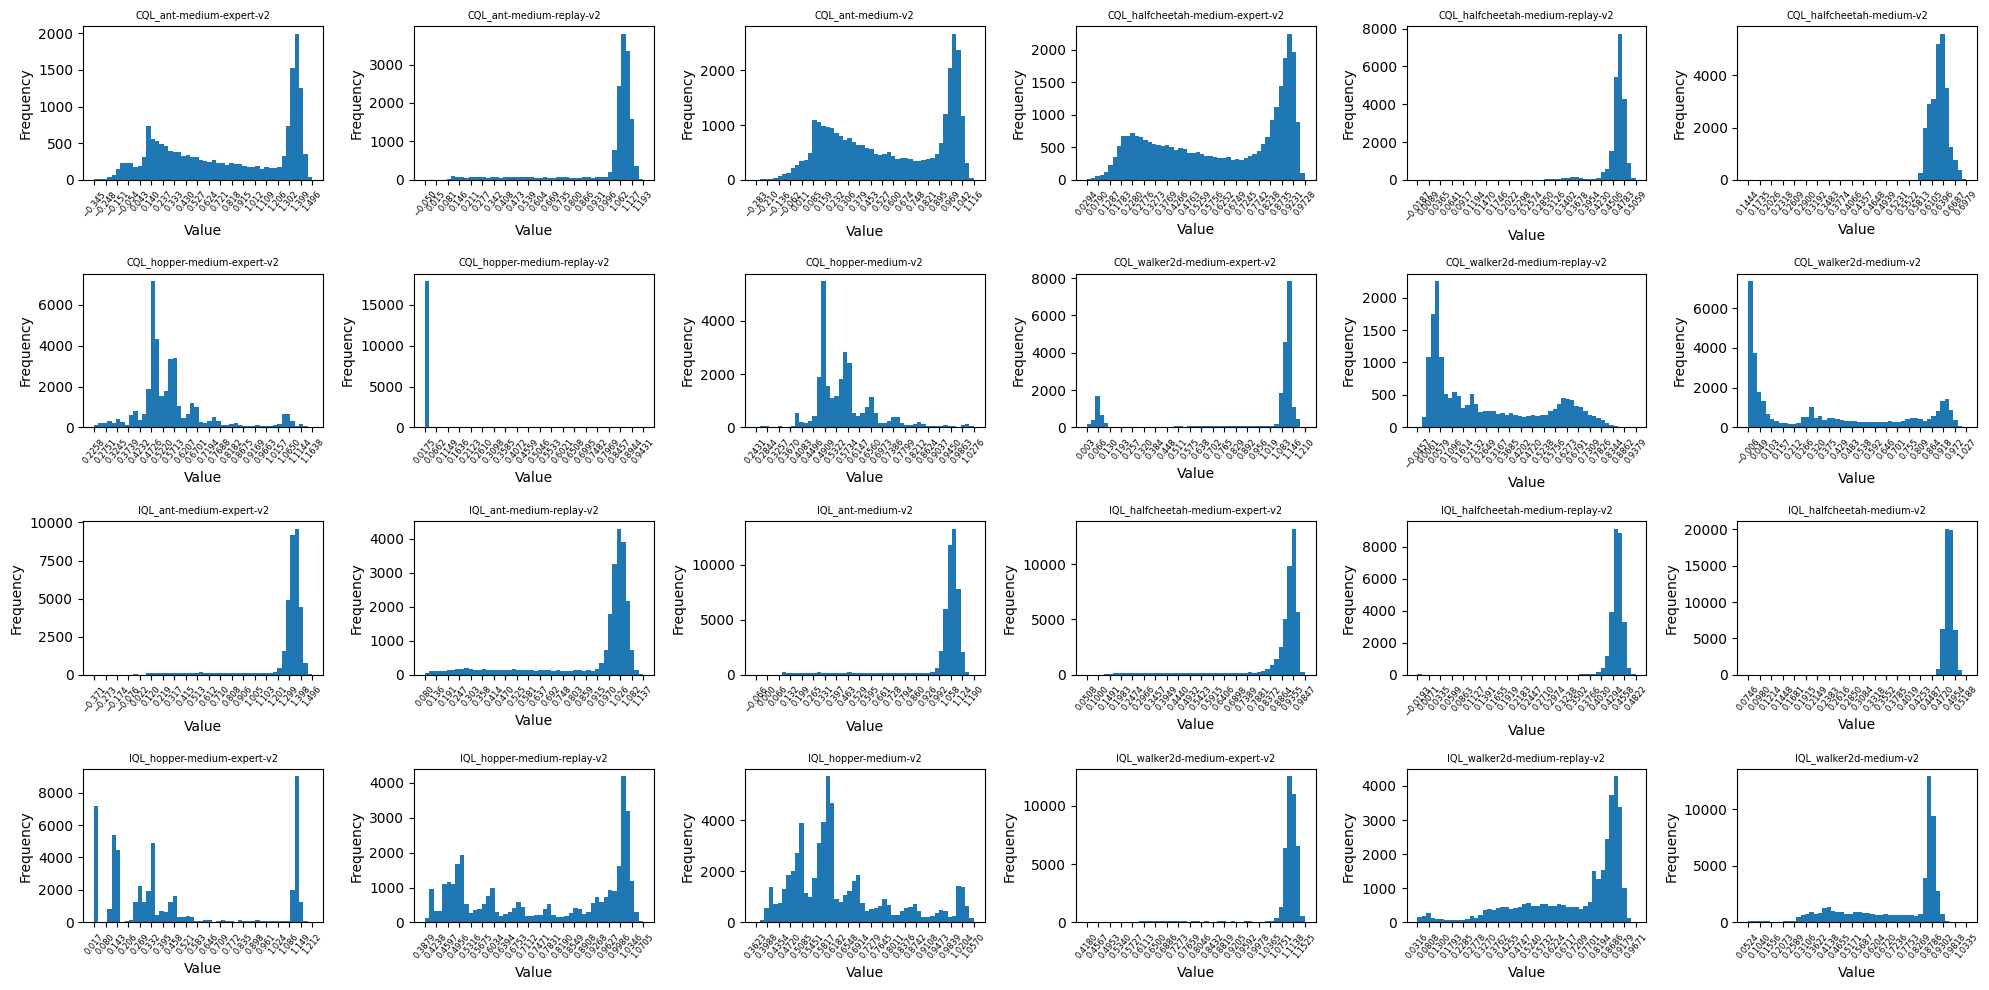

In [ ]:
# array = read_text(file_path)
# plot_hist(array)
n = 4
m = 6
fig, axs = plt.subplots(n, m, figsize=(20, 10))
tasks_algs_scores = []
for i in range(n):
    for j in range(m):
        array = read_text(path_list[m*i+j])
        tasks_algs_scores.append(array)
        array = np.array(array)
        print(len(array), path_list[m*i+j], np.mean(array))
        plot_hist(array, fig, axs, i, j, m)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

./CQL_ant-medium-expert-v2_rollout.txt 17 0.7770329844260297
./CQL_ant-medium-replay-v2_rollout.txt 15 0.9964211526467722
./CQL_ant-medium-v2_rollout.txt 30 0.5789113683783762
./CQL_halfcheetah-medium-expert-v2_rollout.txt 28 0.6119500441430333
./CQL_halfcheetah-medium-replay-v2_rollout.txt 22 0.45943178187584477
./CQL_halfcheetah-medium-v2_rollout.txt 25 0.628028732252552
./CQL_hopper-medium-expert-v2_rollout.txt 37 0.5623447416234763
./CQL_hopper-medium-replay-v2_rollout.txt 18 0.01972614253690913
./CQL_hopper-medium-v2_rollout.txt 27 0.5614118572360813
./CQL_walker2d-medium-expert-v2_rollout.txt 21 0.919292027094003
./CQL_walker2d-medium-replay-v2_rollout.txt 17 0.2655679686895115
./CQL_walker2d-medium-v2_rollout.txt 34 0.3510596683826702
./IQL_ant-medium-expert-v2_rollout.txt 35 1.2570895650854854
./IQL_ant-medium-replay-v2_rollout.txt 23 0.8960863082133372
./IQL_ant-medium-v2_rollout.txt 51 0.9909448160308986
./IQL_halfcheetah-medium-expert-v2_rollout.txt 46 0.8601668328340224
./I

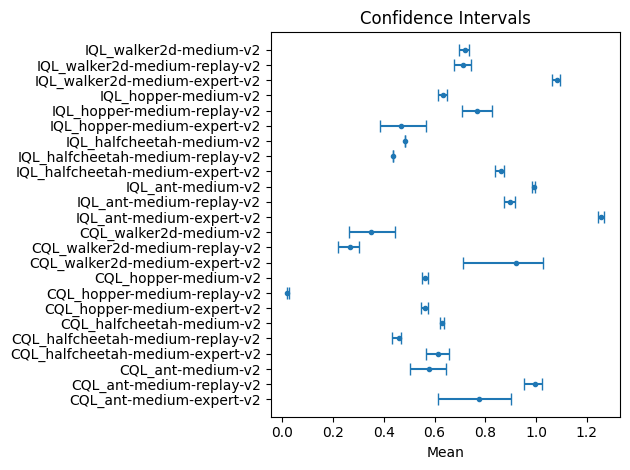

In [ ]:
n = 4; m = 6
mean = []; low = []; high = []
for i in range(n):
    for j in range(m):
        array = tasks_algs_scores[m*i+j]
        avg_array = cal_mean(array)
        mean.append(np.mean(avg_array))
        print(path_list[m*i+j], len(avg_array), np.mean(avg_array))
        avg_array = (avg_array, )
        res = stats.bootstrap(avg_array, np.mean)
        low.append(res.confidence_interval[0])
        high.append(res.confidence_interval[1])

        # plot_hist(res.bootstrap_distribution, fig, axs, i, j, m)

mean = np.array(mean); low = np.array(low); high = np.array(high)
# Plotting
fig, ax = plt.subplots()
ax.errorbar(mean, names_list, xerr=[mean-low, high-mean], fmt='.', capsize=4)

# Set labels and title
ax.set_xlabel('Mean')
ax.set_title('Confidence Intervals')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
a = []
for data in tasks_algs_scores:
    a.append(data[:15000])
a = np.array(a)
a = a.reshape(24, 15, 1000)
means = np.mean(a, axis=2)

In [ ]:
# Create random data for demonstration (replace with your actual data)
num_tasks = 24
data = a
# Define the number of rows and columns for the grid
grid_rows = 3
grid_cols = 5

# Create 10 grids of histograms
for task_idx in range(num_tasks):
    task_data = data[task_idx]

    # Create a new figure for each task
    plt.figure(figsize=(15, 9))  # Adjust the figure size as needed

    for i in range(task_data.shape[0]):
        plt.subplot(grid_rows, grid_cols, i + 1)
        plt.hist(task_data[i], bins=20)  # Adjust the number of bins as needed
        plt.title(f'seed no.{i+1}')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Save or display the figure as needed
    # Replace 'task_figure_<task_idx>.png' with your desired filename
    plt.savefig(f'{names_list[task_idx]}.png')

    # Close the figure to release resources
    plt.close()

# Show all the saved figures (you can remove this if not needed)
plt.show()


In [ ]:
means.shape

(24, 15)

In [ ]:
#Comparing IQL and CQL
for i in range(12):
    print(names_list[i].replace("CQL_", ""))
    for j in range(1, 16):
        t_statistic, p_value = stats.ttest_ind(means[i, :j], means[i+12, :j], equal_var=False)
        CQL_mean = np.mean(means[i, :j])
        IQL_mean = np.mean(means[i+12, :j])

        print(f"CQL_mean: {CQL_mean}, IQL_mean: {IQL_mean}")

        if p_value<0.05:
            if CQL_mean>IQL_mean:
                print(f"CQL_mean better than IQL_mean after {j} runs\n")
                break

            if IQL_mean>CQL_mean:
                print(f"IQL_mean better than CQL_mean after {j} runs\n")
                break

        if j==15:
            print(f'p_value: {p_value}')
            print("require more runs to be statistically significant\n")


ant-medium-expert-v2
CQL_mean: 0.9543712610837131, IQL_mean: 1.2708614799108906
CQL_mean: 0.8939265473585876, IQL_mean: 1.2483071758273874
CQL_mean: 0.6221703417189175, IQL_mean: 1.2455785661440766
CQL_mean: 0.6318541642214168, IQL_mean: 1.246895692015066
CQL_mean: 0.6684305136514327, IQL_mean: 1.2544931503230856
IQL_mean better than CQL_mean after 5 runs

ant-medium-replay-v2
CQL_mean: 1.0354516988001274, IQL_mean: 0.8552958487466399
CQL_mean: 1.0385839347788324, IQL_mean: 0.9136455098054816
CQL_mean: 0.9655113193766973, IQL_mean: 0.9042339592507883
CQL_mean: 0.9717403077647152, IQL_mean: 0.9037428149537804
CQL_mean: 0.9848580968416731, IQL_mean: 0.9092596794907036
CQL_mean: 0.9883753747535305, IQL_mean: 0.9155937398410036
CQL_mean: 0.9755881413121976, IQL_mean: 0.9140974357969757
CQL_mean: 0.9855447195300344, IQL_mean: 0.9093954386272269
CQL_mean better than IQL_mean after 8 runs

ant-medium-v2
CQL_mean: 0.5066001195186189, IQL_mean: 0.9835998684934493
CQL_mean: 0.705545715832496, IQ

<ipython-input-77-063c552e8235>:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(means[i, :j], means[i+12, :j], equal_var=False)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [ ]:
names_list[6], names_list[6+12]

('CQL_hopper-medium-expert-v2', 'IQL_hopper-medium-expert-v2')

In [ ]:
i = 6; j = 18
a = []
a = tasks_algs_scores[i]
b = tasks_algs_scores[j]
a = a[:37000]
b = b[:37000]
a = np.array(a)
b = np.array(b)
a = a.reshape(37, 1000)
b = b.reshape(37, 1000)
mean1 = np.mean(a, axis=1)
mean2 = np.mean(b, axis=1)

print(names_list[i].replace("CQL_", ""))
for j in range(1, 38):
    t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)
    CQL_mean = np.mean(mean1[:j])
    IQL_mean = np.mean(mean2[:j])

    print(f"CQL_mean: {CQL_mean}, IQL_mean: {IQL_mean}")

    if p_value<0.05:
        if CQL_mean>IQL_mean:
            print(f"CQL_mean better than IQL_mean after {j} runs\n")
            break

        if IQL_mean>CQL_mean:
            print(f"IQL_mean better than CQL_mean after {j} runs\n")
            break

    if j==37:
        print(f'p_value: {p_value}')
        print("require more runs to be statistically significant\n")

hopper-medium-expert-v2
CQL_mean: 0.5701322332868448, IQL_mean: 0.11670893687832602
CQL_mean: 0.5454673447013089, IQL_mean: 0.19756079238512259
CQL_mean: 0.5518937650520586, IQL_mean: 0.49282187490459856
CQL_mean: 0.5506744472582648, IQL_mean: 0.402329299839098
CQL_mean: 0.5553658752273034, IQL_mean: 0.3452052272469436
CQL_mean: 0.5405688778594205, IQL_mean: 0.3340731306877729
CQL_mean: 0.5566791527365895, IQL_mean: 0.44111183201002685
CQL_mean: 0.5663150397958299, IQL_mean: 0.402329299839098
CQL_mean: 0.5570658077471471, IQL_mean: 0.3598914313865549
CQL_mean: 0.5606978269957809, IQL_mean: 0.3385154465828406
CQL_mean: 0.5620585810420743, IQL_mean: 0.3403774576887242
CQL_mean: 0.5647474809772761, IQL_mean: 0.34524731123715385
CQL_mean: 0.5584992073092049, IQL_mean: 0.3658388374418627
CQL_mean: 0.5481728912650868, IQL_mean: 0.3839192908472776
CQL_mean: 0.5516333754997339, IQL_mean: 0.3752543152946026
CQL_mean: 0.5526994350801269, IQL_mean: 0.37218795952408745
CQL_mean better than IQL_mea

<ipython-input-79-332a3056db64>:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)


In [ ]:
i = 9; j = 21; n = 21
a = tasks_algs_scores[i]
b = tasks_algs_scores[j]
a = a[:n*1000]
b = b[:n*1000]
a = np.array(a)
b = np.array(b)
a = a.reshape(n, 1000)
b = b.reshape(n, 1000)
mean1 = np.mean(a, axis=1)
mean2 = np.mean(b, axis=1)

print(names_list[i].replace("CQL_", ""))
for j in range(1, n+1):
    t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)
    CQL_mean = np.mean(mean1[:j])
    IQL_mean = np.mean(mean2[:j])

    print(f"CQL_mean: {CQL_mean}, IQL_mean: {IQL_mean}")

    if p_value<0.05:
        if CQL_mean>IQL_mean:
            print(f"CQL_mean better than IQL_mean after {j} runs\n")
            break

        if IQL_mean>CQL_mean:
            print(f"IQL_mean better than CQL_mean after {j} runs\n")
            break

    if j==n:
        print(f'p_value: {p_value}')
        print("require more runs to be statistically significant\n")

walker2d-medium-expert-v2
CQL_mean: 1.0846130969150076, IQL_mean: 1.043236700467356
CQL_mean: 0.5885020955320968, IQL_mean: 1.073780571571492
CQL_mean: 0.7547076366883356, IQL_mean: 1.0593881389333009
CQL_mean: 0.8423443212929456, IQL_mean: 1.0754168079397781
CQL_mean: 0.8985265739691233, IQL_mean: 1.081104797093466
CQL_mean: 0.932034895758894, IQL_mean: 1.086283511308273
CQL_mean: 0.951113738415099, IQL_mean: 1.0888143358157552
CQL_mean: 0.959198689574055, IQL_mean: 1.0905345306553706
CQL_mean: 0.9770636409956569, IQL_mean: 1.0934894542795783
CQL_mean: 0.9937372606768513, IQL_mean: 1.0948214019917053
CQL_mean: 0.9915236157732426, IQL_mean: 1.0944197684204904
CQL_mean: 0.9961358199079569, IQL_mean: 1.0949280757432804
CQL_mean: 0.9241977533592287, IQL_mean: 1.0972567686876993
CQL_mean: 0.9223542988129143, IQL_mean: 1.0944644676853648
CQL_mean: 0.9325571774900657, IQL_mean: 1.0865180973243542
CQL_mean: 0.9405109585441365, IQL_mean: 1.0877459012033348
CQL_mean: 0.8933272674772276, IQL_mea

<ipython-input-80-c12e4839e6c2>:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)


In [ ]:
def plot_hist(data, names, fig, axs, i, j, m):
    axs[i, j].hist(data, bins=40)  # Adjust the number of bins as needed

    # Set labels and title
    axs[i, j].set_xlabel('Value')
    axs[i, j].set_ylabel('Frequency')
    axs[i, j].set_title(f'{names[m*i+j]}', fontsize=10)
    # axs[i, j].set_title(names, fontsize=10)

    axs[i, j].set_xticks(np.linspace(data.min(), data.max(), num=10))
    axs[i, j].tick_params(axis='x', rotation=50, labelsize=8)

In [ ]:
# Define the project name and number of runs
project_name = "CORL_take2"
project_2 = "CORL_take3"
project_3 = "CORL_take4"
# Fetch the runs from the project
api = wandb.Api()
runs = api.runs(project_name, order="created_at")
runs_2 = api.runs(project_2, order="created_at")
runs_3 = api.runs(project_3, order="created_at")
accs = []
names = []
# Iterate over the runs
for run in runs:
    # Access the logged accuracy data
    accuracy_data = run.history(samples=999999, keys=["12000.0 rollout no. 999"])

    # Process and use the accuracy data as needed
    # For example, you can convert it to a NumPy array
    accuracy_array = accuracy_data.iloc[:, 1]
    accs.append(accuracy_array)
    names.append(run.name[:-9])

for run in runs_2:
    # Access the logged accuracy data
    accuracy_data = run.history(samples=999999, keys=["12000.0 rollout no. 999"])

    # Process and use the accuracy data as needed
    # For example, you can convert it to a NumPy array
    accuracy_array = accuracy_data.iloc[:, 1]
    accs.append(accuracy_array)
    names.append(run.name[:-9])
    if "hopper-medium-replay-v2" in run.name:
        for r in runs_3:
            if "hopper-medium-replay-v2" in r.name:
                accuracy_data = r.history(samples=999999, keys=["12000.0 rollout no. 999"])
                accuracy_array = accuracy_data.iloc[:, 1]
                inc_array = accs[-1]
                left_over = 50000-len(inc_array)
                com_array = pd.concat([inc_array, accuracy_array.head(left_over)])
                accs[-1] = com_array

sorted_pairs = sorted(zip(names, accs))

# Unpack the sorted pairs back into the two lists
names, accs = zip(*sorted_pairs)



<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
#Comparing CQL and DT
for i in range(12):
    print(names_list[i].replace("CQL_", ""))
    for j in range(1, 13):
        m = np.mean(np.array(accs[i].head(j*1000)).reshape(j, 1000), axis=1)/100
        t_statistic, p_value = stats.ttest_ind(means[i, :j], m, equal_var=False)
        CQL_mean = np.mean(means[i, :j])
        DT_mean = np.mean(m)

        print(f"CQL_mean: {CQL_mean}, DT_mean: {DT_mean}")

        if p_value<0.05:
            if CQL_mean>DT_mean:
                print(f"CQL_mean better than DT_mean after {j} runs\n")
                break

            if DT_mean>CQL_mean:
                print(f"DT_mean better than CQL_mean after {j} runs\n")
                break

        if j==12:
            print(f'p_value: {p_value}')
            print("require more runs to be statistically significant\n")

ant-medium-expert-v2
CQL_mean: 0.9543712610837131, DT_mean: 1.1572324512959904
CQL_mean: 0.8939265473585876, DT_mean: 1.1961349275877984
CQL_mean: 0.6221703417189175, DT_mean: 1.2130639266485448
CQL_mean: 0.6318541642214168, DT_mean: 1.1974177339848597
CQL_mean: 0.6684305136514327, DT_mean: 1.2050239425134994
DT_mean better than CQL_mean after 5 runs

ant-medium-replay-v2
CQL_mean: 1.0354516988001274, DT_mean: 0.9083916458945577
CQL_mean: 1.0385839347788324, DT_mean: 0.8939254743139938
CQL_mean: 0.9655113193766973, DT_mean: 0.9018051915127744
CQL_mean: 0.9717403077647152, DT_mean: 0.9074972506832235
CQL_mean: 0.9848580968416731, DT_mean: 0.9093311061033333
CQL_mean: 0.9883753747535305, DT_mean: 0.9081384237968039
CQL_mean: 0.9755881413121976, DT_mean: 0.9103888981945495
CQL_mean: 0.9855447195300344, DT_mean: 0.9079460742942876
CQL_mean better than DT_mean after 8 runs

ant-medium-v2
CQL_mean: 0.5066001195186189, DT_mean: 0.9090104754024569
CQL_mean: 0.705545715832496, DT_mean: 0.887118

<ipython-input-83-eb6528d56ad4>:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(means[i, :j], m, equal_var=False)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [ ]:
i = 9; j = 21; n=21
a = tasks_algs_scores[i]
b = np.mean(np.array(accs[i].head(n*1000)).reshape(n, 1000), axis=1)/100
b = tasks_algs_scores[j]
a = a[:n*1000]
a = np.array(a)
a = a.reshape(n, 1000)
mean1 = np.mean(a, axis=1)
mean2 = b

print(names_list[i].replace("CQL_", ""))
for j in range(1, n+1):
    t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)
    CQL_mean = np.mean(mean1[:j])
    DT_mean = np.mean(mean2[:j])

    print(f"CQL_mean: {CQL_mean}, DT_mean: {DT_mean}")

    if p_value<0.05:
        if CQL_mean>DT_mean:
            print(f"CQL_mean better than DT_mean after {j} runs\n")
            break

        if DT_mean>CQL_mean:
            print(f"DT_mean better than CQL_mean after {j} runs\n")
            break

    if j==n:
        print(f'p_value: {p_value}')
        print("require more runs to be statistically significant\n")

walker2d-medium-expert-v2
CQL_mean: 1.0846130969150076, DT_mean: 1.07078519872106
CQL_mean: 0.5885020955320968, DT_mean: 1.0739076537315102
CQL_mean: 0.7547076366883356, DT_mean: 1.0887963121815396
CQL_mean: 0.8423443212929456, DT_mean: 1.0916382727399552
CQL_mean: 0.8985265739691233, DT_mean: 1.0941272852679698
CQL_mean: 0.932034895758894, DT_mean: 1.0948398198000702
CQL_mean: 0.951113738415099, DT_mean: 1.0961777120417857
CQL_mean: 0.959198689574055, DT_mean: 1.0958707600502906
CQL_mean: 0.9770636409956569, DT_mean: 1.0952578429954654
CQL_mean: 0.9937372606768513, DT_mean: 1.09464479838179
CQL_mean: 0.9915236157732426, DT_mean: 1.0731510032996845
CQL_mean: 0.9961358199079569, DT_mean: 1.0694677649027902
CQL_mean: 0.9241977533592287, DT_mean: 1.044986588815988
CQL_mean: 0.9223542988129143, DT_mean: 1.049331147858493
CQL_mean: 0.9325571774900657, DT_mean: 1.0527735256576876
CQL_mean: 0.9405109585441365, DT_mean: 1.0547864850228361
CQL_mean: 0.8933272674772276, DT_mean: 1.04691723393281

<ipython-input-84-dd7e444265fc>:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)


In [ ]:
#Comparing IQL and DT
for i in range(12):
    print(names_list[i].replace("CQL_", ""))
    for j in range(1, 13):
        m = np.mean(np.array(accs[i].head(j*1000)).reshape(j, 1000), axis=1)/100
        t_statistic, p_value = stats.ttest_ind(means[i+12, :j], m, equal_var=False)
        IQL_mean = np.mean(means[i+12, :j])
        DT_mean = np.mean(m)

        print(f"IQL_mean: {IQL_mean}, DT_mean: {DT_mean}")

        if p_value<0.05:
            if IQL_mean>DT_mean:
                print(f"IQL_mean better than DT_mean after {j} runs\n")
                break

            if DT_mean>IQL_mean:
                print(f"DT_mean better than IQL_mean after {j} runs\n")
                break

        if j==12:
            print(f'p_value: {p_value}')
            print("require more runs to be statistically significant\n")

ant-medium-expert-v2
IQL_mean: 1.2708614799108906, DT_mean: 1.1572324512959904
IQL_mean: 1.2483071758273874, DT_mean: 1.1961349275877984
IQL_mean: 1.2455785661440766, DT_mean: 1.2130639266485448
IQL_mean: 1.246895692015066, DT_mean: 1.1974177339848597
IQL_mean: 1.2544931503230856, DT_mean: 1.2050239425134994
IQL_mean: 1.2501149178276656, DT_mean: 1.190821772910972
IQL_mean better than DT_mean after 6 runs

ant-medium-replay-v2
IQL_mean: 0.8552958487466399, DT_mean: 0.9083916458945577
IQL_mean: 0.9136455098054816, DT_mean: 0.8939254743139938
IQL_mean: 0.9042339592507883, DT_mean: 0.9018051915127744
IQL_mean: 0.9037428149537804, DT_mean: 0.9074972506832235
IQL_mean: 0.9092596794907036, DT_mean: 0.9093311061033333
IQL_mean: 0.9155937398410036, DT_mean: 0.9081384237968039
IQL_mean: 0.9140974357969757, DT_mean: 0.9103888981945495
IQL_mean: 0.9093954386272269, DT_mean: 0.9079460742942876
IQL_mean: 0.9056582977385873, DT_mean: 0.909513124587867
IQL_mean: 0.9084255310731466, DT_mean: 0.9064129

<ipython-input-85-55cf417b1bd6>:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(means[i+12, :j], m, equal_var=False)


In [ ]:
i = 1; j = 13; n=23
a = tasks_algs_scores[j]
b = np.mean(np.array(accs[i].head(n*1000)).reshape(n, 1000), axis=1)/100
a = a[:n*1000]
a = np.array(a)
a = a.reshape(n, 1000)
mean1 = np.mean(a, axis=1)
mean2 = b

print(names_list[i].replace("CQL_", ""))
for j in range(1, n+1):
    t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)
    IQL_mean = np.mean(mean1[:j])
    DT_mean = np.mean(mean2[:j])

    print(f"IQL_mean: {IQL_mean}, DT_mean: {DT_mean}")

    if p_value<0.05:
        if IQL_mean>DT_mean:
            print(f"IQL_mean better than DT_mean after {j} runs\n")
            break

        if DT_mean>IQL_mean:
            print(f"DT_mean better than IQL_mean after {j} runs\n")
            break

    if j==n:
        print(f'p_value: {p_value}')
        print("require more runs to be statistically significant\n")

ant-medium-replay-v2
IQL_mean: 0.8552958487466399, DT_mean: 0.9083916458945577
IQL_mean: 0.9136455098054816, DT_mean: 0.8939254743139938
IQL_mean: 0.9042339592507883, DT_mean: 0.9018051915127744
IQL_mean: 0.9037428149537804, DT_mean: 0.9074972506832235
IQL_mean: 0.9092596794907036, DT_mean: 0.9093311061033333
IQL_mean: 0.9155937398410036, DT_mean: 0.9081384237968039
IQL_mean: 0.9140974357969757, DT_mean: 0.9103888981945495
IQL_mean: 0.9093954386272269, DT_mean: 0.9079460742942876
IQL_mean: 0.9056582977385873, DT_mean: 0.909513124587867
IQL_mean: 0.9084255310731466, DT_mean: 0.9064129275411782
IQL_mean: 0.9156529145317038, DT_mean: 0.9074578451348682
IQL_mean: 0.9121816400954845, DT_mean: 0.9084235674199252
IQL_mean: 0.9116567328780556, DT_mean: 0.9092407183797638
IQL_mean: 0.9153721369906468, DT_mean: 0.908116740675083
IQL_mean: 0.9148731009256108, DT_mean: 0.9094811531426397
IQL_mean: 0.9086861410466462, DT_mean: 0.9113087998922133
IQL_mean: 0.9006528861654008, DT_mean: 0.911967629660

<ipython-input-86-2e06f9a00b04>:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)


In [ ]:
i = 7; j = 19; n=34
a = tasks_algs_scores[j]
b = np.mean(np.array(accs[i].head(n*1000)).reshape(n, 1000), axis=1)/100
a = a[:n*1000]
a = np.array(a)
a = a.reshape(n, 1000)
mean1 = np.mean(a, axis=1)
mean2 = b

print(names_list[i].replace("CQL_", ""))
for j in range(1, n+1):
    t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)
    IQL_mean = np.mean(mean1[:j])
    DT_mean = np.mean(mean2[:j])

    print(f"IQL_mean: {IQL_mean}, DT_mean: {DT_mean}")

    if p_value<0.05:
        if IQL_mean>DT_mean:
            print(f"IQL_mean better than DT_mean after {j} runs\n")
            break

        if DT_mean>IQL_mean:
            print(f"DT_mean better than IQL_mean after {j} runs\n")
            break

    if j==n:
        print(f'p_value: {p_value}')
        print("require more runs to be statistically significant\n")

hopper-medium-replay-v2
IQL_mean: 1.0064476704305723, DT_mean: 0.828581477658243
IQL_mean: 0.8385298402984163, DT_mean: 0.7834883242228362
IQL_mean: 0.8560908952494907, DT_mean: 0.8120790983105922
IQL_mean: 0.7831852753428747, DT_mean: 0.7839012268921497
IQL_mean: 0.779046173105912, DT_mean: 0.7621084495159988
IQL_mean: 0.7421905195481563, DT_mean: 0.7811691362949577
IQL_mean: 0.7799415411027871, DT_mean: 0.764585110866224
IQL_mean: 0.7662753497357212, DT_mean: 0.7599807900561979
IQL_mean: 0.780157311448601, DT_mean: 0.7570987725213011
IQL_mean: 0.7585884218660436, DT_mean: 0.7265737474262199
IQL_mean: 0.758943089347136, DT_mean: 0.6945222397419131
IQL_mean: 0.7421905195481561, DT_mean: 0.6937986454194366
IQL_mean: 0.7634893065576669, DT_mean: 0.6798074347907666
IQL_mean: 0.7791357278160633, DT_mean: 0.6738003223221288
IQL_mean: 0.7656638310251472, DT_mean: 0.6509657787804639
IQL_mean: 0.7536592671597148, DT_mean: 0.6290866960502348
IQL_mean: 0.7601267943139759, DT_mean: 0.628239758548

<ipython-input-87-114b623b8203>:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)


In [ ]:
i = 8; j = 20; n=50
a = tasks_algs_scores[j]
b = np.mean(np.array(accs[i].head(n*1000)).reshape(n, 1000), axis=1)/100
a = a[:n*1000]
a = np.array(a)
a = a.reshape(n, 1000)
mean1 = np.mean(a, axis=1)
mean2 = b

print(names_list[i].replace("CQL_", ""))
for j in range(1, n+1):
    t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)
    IQL_mean = np.mean(mean1[:j])
    DT_mean = np.mean(mean2[:j])

    print(f"IQL_mean: {IQL_mean}, DT_mean: {DT_mean}")

    if p_value<0.05:
        if IQL_mean>DT_mean:
            print(f"IQL_mean better than DT_mean after {j} runs\n")
            break

        if DT_mean>IQL_mean:
            print(f"DT_mean better than IQL_mean after {j} runs\n")
            break

    if j==n:
        print(f'p_value: {p_value}')
        print("require more runs to be statistically significant\n")

hopper-medium-v2
IQL_mean: 0.5535154988933366, DT_mean: 0.609028250021877
IQL_mean: 0.5857586247142188, DT_mean: 0.5947973728754413
IQL_mean: 0.6020667975562831, DT_mean: 0.6303173617688729
IQL_mean: 0.6290356580034611, DT_mean: 0.6296887124993482
IQL_mean: 0.6381903271543673, DT_mean: 0.6299727811964622
IQL_mean: 0.6462643882746991, DT_mean: 0.6367925157824841
IQL_mean: 0.636179413919373, DT_mean: 0.637482180103965
IQL_mean: 0.6455921612163331, DT_mean: 0.633747731171589
IQL_mean: 0.6336237147881882, DT_mean: 0.6359036119442599
IQL_mean: 0.6393449923557049, DT_mean: 0.6366553458358373
IQL_mean: 0.6508852963181426, DT_mean: 0.6403750210630083
IQL_mean: 0.6465017265785077, DT_mean: 0.6368543824495465
IQL_mean: 0.6505471610969911, DT_mean: 0.6337677895256083
IQL_mean: 0.6450597549056496, DT_mean: 0.6320299259779472
IQL_mean: 0.6374942162374793, DT_mean: 0.6355776880886382
IQL_mean: 0.6367176267298069, DT_mean: 0.6329334862257696
IQL_mean: 0.6413317904625991, DT_mean: 0.631713703043603
IQ

<ipython-input-88-423dea00fb7b>:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)


In [ ]:
i = 9; j = 21; n=42
a = tasks_algs_scores[j]
b = np.mean(np.array(accs[i].head(n*1000)).reshape(n, 1000), axis=1)/100
a = a[:n*1000]
a = np.array(a)
a = a.reshape(n, 1000)
mean1 = np.mean(a, axis=1)
mean2 = b

print(names_list[i].replace("CQL_", ""))
for j in range(1, n+1):
    t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)
    IQL_mean = np.mean(mean1[:j])
    DT_mean = np.mean(mean2[:j])

    print(f"IQL_mean: {IQL_mean}, DT_mean: {DT_mean}")

    if p_value<0.05:
        if IQL_mean>DT_mean:
            print(f"IQL_mean better than DT_mean after {j} runs\n")
            break

        if DT_mean>IQL_mean:
            print(f"DT_mean better than IQL_mean after {j} runs\n")
            break

    if j==n:
        print(f'p_value: {p_value}')
        print("require more runs to be statistically significant\n")

walker2d-medium-expert-v2
IQL_mean: 1.043236700467356, DT_mean: 1.087066386798832
IQL_mean: 1.073780571571492, DT_mean: 1.0840854410603606
IQL_mean: 1.0593881389333009, DT_mean: 1.0827849182861817
IQL_mean: 1.0754168079397781, DT_mean: 1.082999399781283
IQL_mean: 1.081104797093466, DT_mean: 1.0838508035652974
IQL_mean: 1.086283511308273, DT_mean: 1.0822893287666242
IQL_mean: 1.0888143358157552, DT_mean: 1.0821086274514289
IQL_mean: 1.0905345306553706, DT_mean: 1.0829075654845481
IQL_mean: 1.0934894542795783, DT_mean: 1.0831540675759808
IQL_mean: 1.0948214019917053, DT_mean: 1.0833608931095593
IQL_mean: 1.0944197684204904, DT_mean: 1.0831655041965633
IQL_mean: 1.0949280757432804, DT_mean: 1.0833794822636502
IQL_mean: 1.0972567686876993, DT_mean: 1.0834592467420237
IQL_mean: 1.0944644676853648, DT_mean: 1.0838053380246178
IQL_mean: 1.0865180973243542, DT_mean: 1.0839589962322367
IQL_mean: 1.0877459012033348, DT_mean: 1.0837643042048
IQL_mean: 1.0850548793953407, DT_mean: 1.08413548856618

<ipython-input-89-e596d5b063a8>:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)


In [ ]:
i = 11; j = 23; n=50
a = tasks_algs_scores[j]
b = np.mean(np.array(accs[i].head(n*1000)).reshape(n, 1000), axis=1)/100
a = a[:n*1000]
a = np.array(a)
a = a.reshape(n, 1000)
mean1 = np.mean(a, axis=1)
mean2 = b

print(names_list[i].replace("CQL_", ""))
for j in range(1, n+1):
    t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)
    IQL_mean = np.mean(mean1[:j])
    DT_mean = np.mean(mean2[:j])

    print(f"IQL_mean: {IQL_mean}, DT_mean: {DT_mean}")

    if p_value<0.05:
        if IQL_mean>DT_mean:
            print(f"IQL_mean better than DT_mean after {j} runs\n")
            break

        if DT_mean>IQL_mean:
            print(f"DT_mean better than IQL_mean after {j} runs\n")
            break

    if j==n:
        print(f'p_value: {p_value}')
        print("require more runs to be statistically significant\n")

walker2d-medium-v2
IQL_mean: 0.6707071526496934, DT_mean: 0.7299278182762073
IQL_mean: 0.7113813199895211, DT_mean: 0.7359631999175542
IQL_mean: 0.7040502998364048, DT_mean: 0.7282180402890165
IQL_mean: 0.7075196397602147, DT_mean: 0.7322004937022255
IQL_mean: 0.7127424145413134, DT_mean: 0.7319799322641102
IQL_mean: 0.7248291619120021, DT_mean: 0.7318194190556316
IQL_mean: 0.7304549941534112, DT_mean: 0.7304987505774418
IQL_mean: 0.7320284536062567, DT_mean: 0.727028672116935
IQL_mean: 0.7252226114662798, DT_mean: 0.7307179602066981
IQL_mean: 0.7252683525359167, DT_mean: 0.7299074898174166
IQL_mean: 0.7296624501642576, DT_mean: 0.7294987642849787
IQL_mean: 0.7368288835702296, DT_mean: 0.7289718846315817
IQL_mean: 0.738622360424747, DT_mean: 0.7273605432655713
IQL_mean: 0.7415283783642599, DT_mean: 0.7266575436308277
IQL_mean: 0.7392209925559228, DT_mean: 0.726625154570659
IQL_mean: 0.7414903855500443, DT_mean: 0.7265592381362085
IQL_mean: 0.7308177590289547, DT_mean: 0.724803732024189

<ipython-input-90-61be2d52f46b>:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(mean1[:j], mean2[:j], equal_var=False)


50000 DT-ant-medium-expert-v2
50000 DT-ant-medium-replay-v2
50000 DT-ant-medium-v2
50000 DT-halfcheetah-medium-expert-v2
50000 DT-halfcheetah-medium-replay-v2
50000 DT-halfcheetah-medium-v2
50000 DT-hopper-medium-expert-v2
40000 DT-hopper-medium-replay-v2
50000 DT-hopper-medium-v2
50000 DT-walker2d-medium-expert-v2
50000 DT-walker2d-medium-replay-v2
50000 DT-walker2d-medium-v2


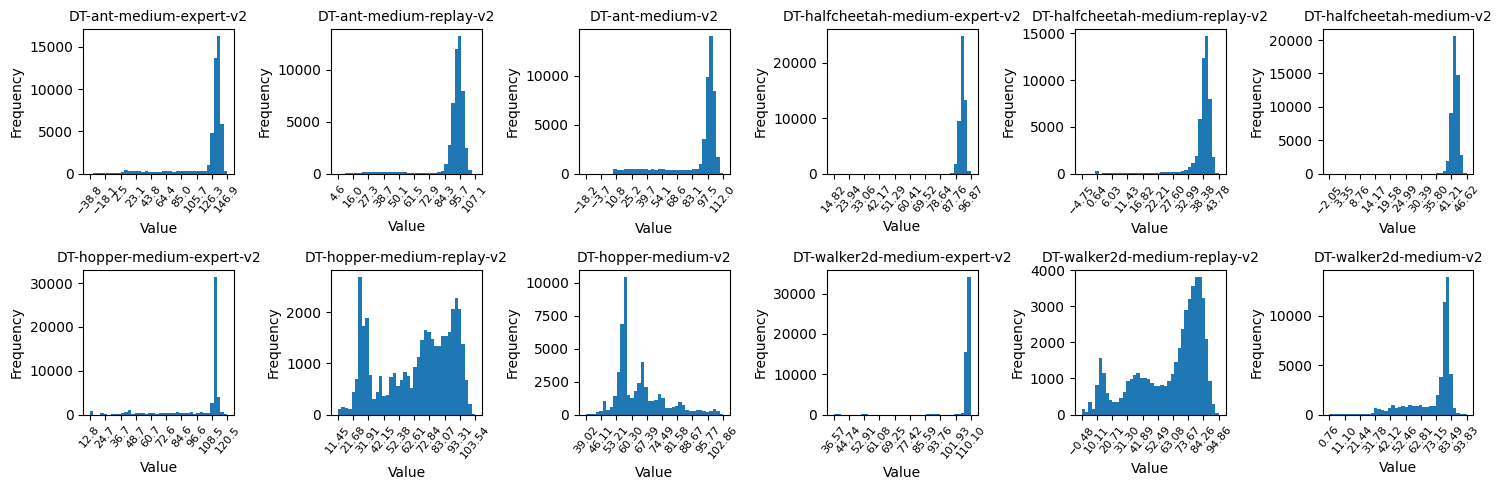

In [ ]:
n = 2
m = 6
fig, axs = plt.subplots(n, m, figsize=(15, 5))

for i in range(n):
    for j in range(m):
        array = accs[m*i+j]
        print(len(array), names[m*i+j])
        plot_hist(array, names, fig, axs, i, j, m)

# Adjust the spacing between subplots
#plt.xlim(-40, 150)
plt.tight_layout()

# Show the plot
plt.show()

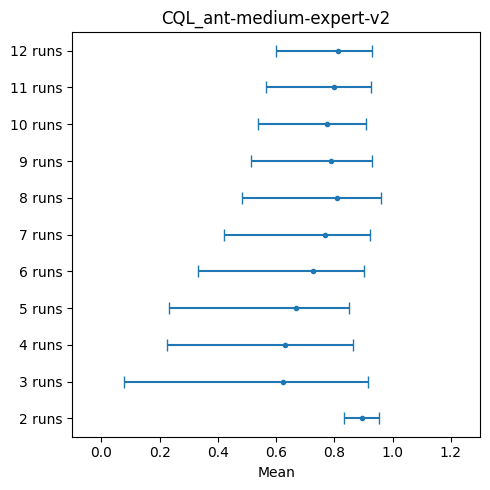

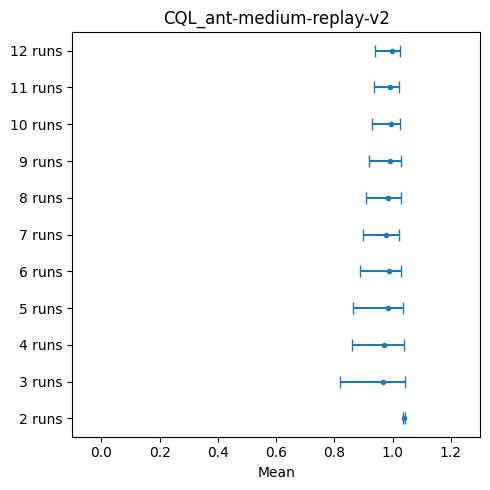

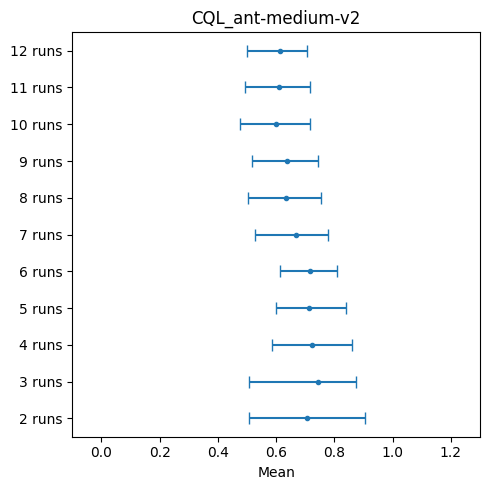

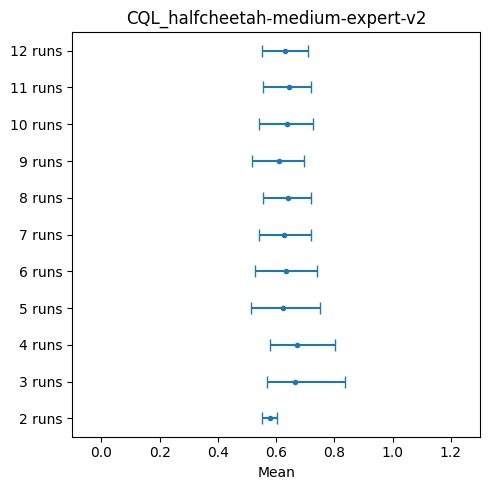

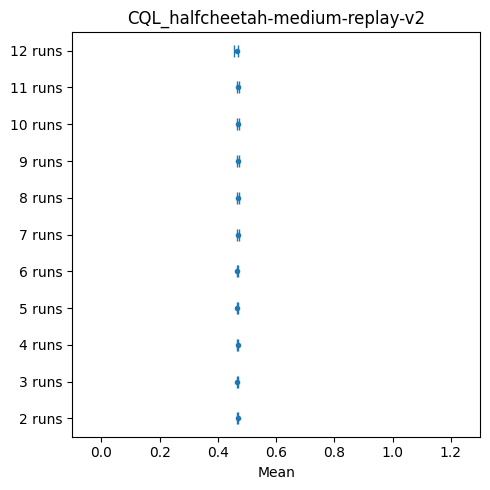

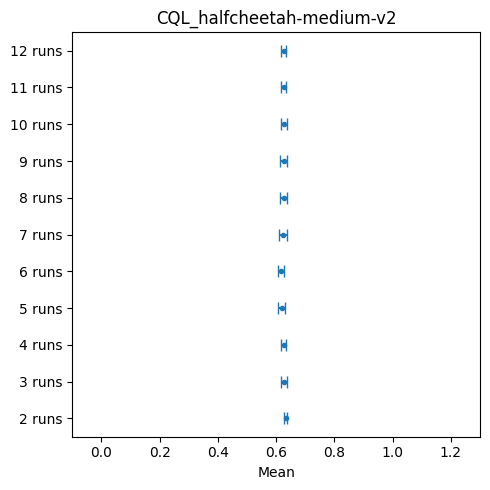

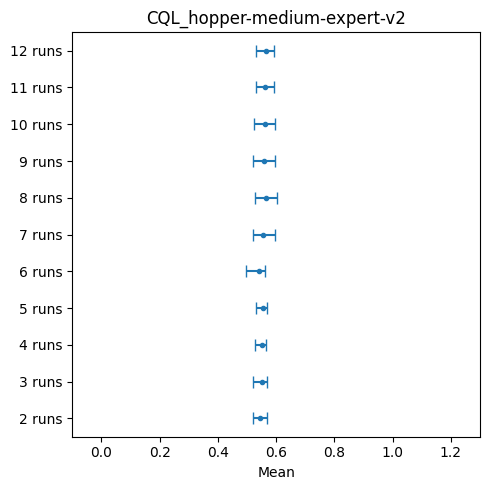

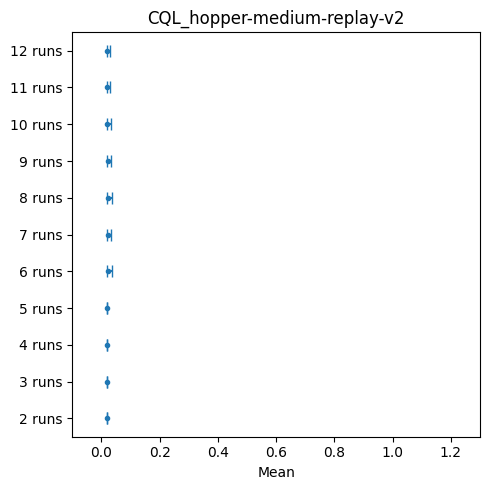

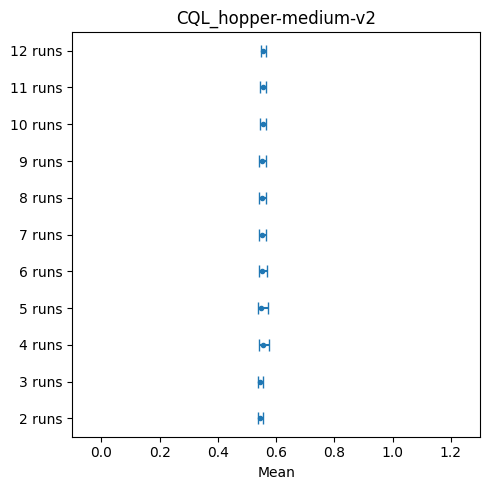

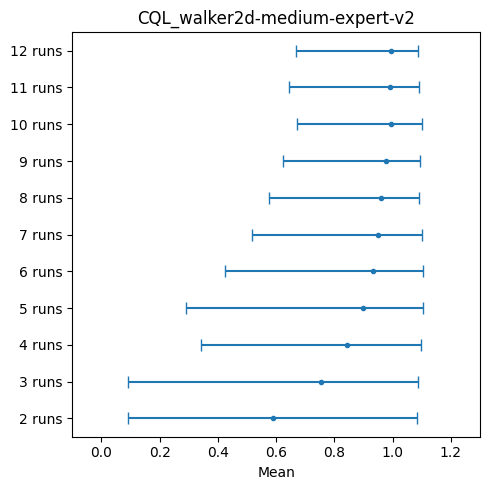

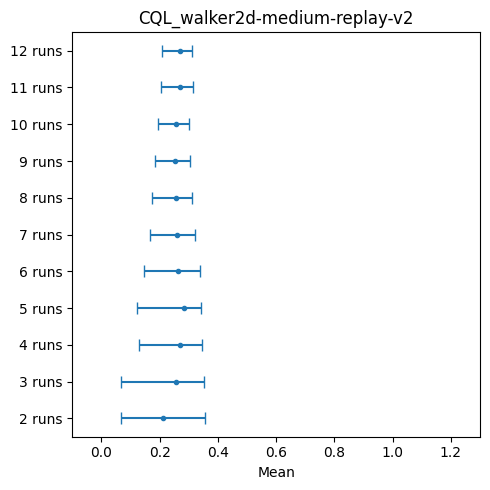

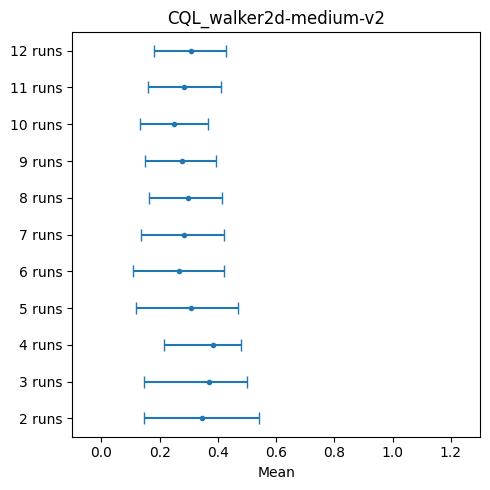

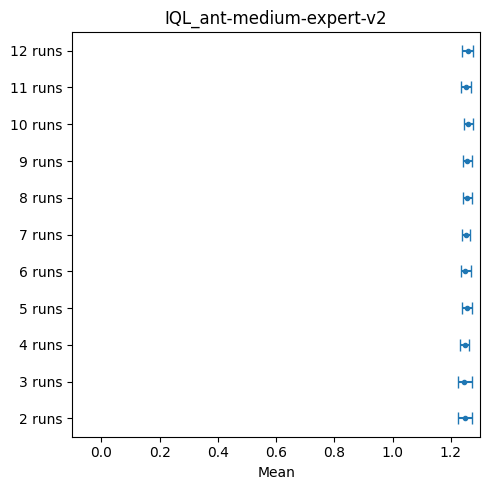

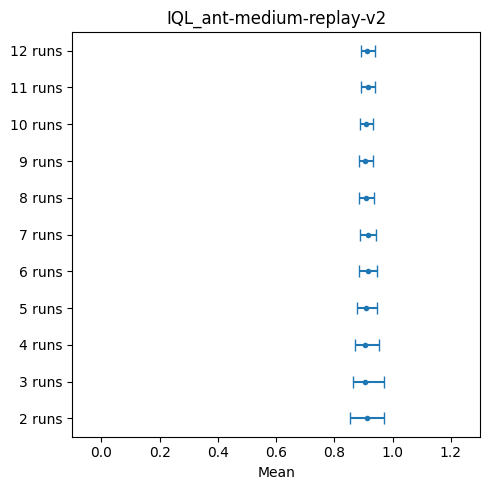

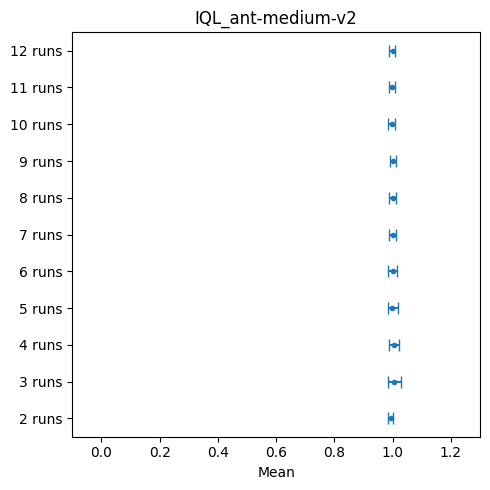

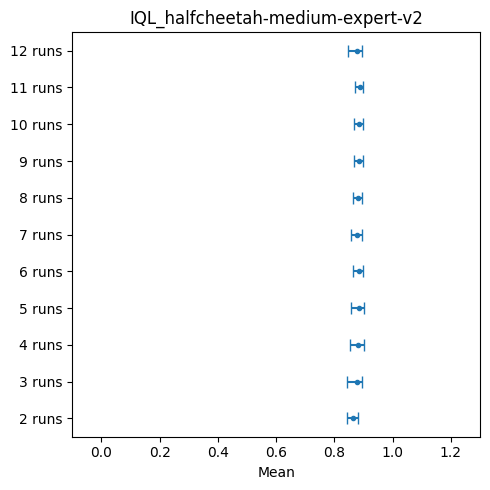

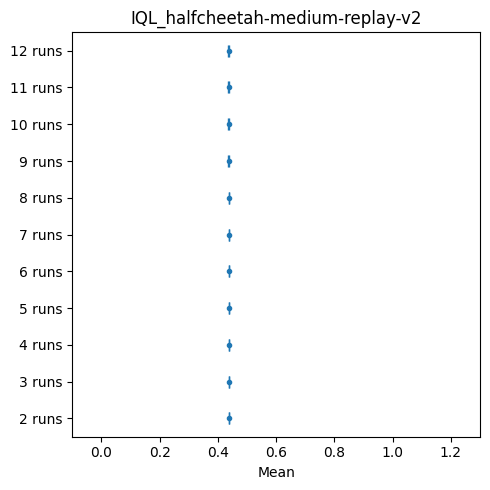

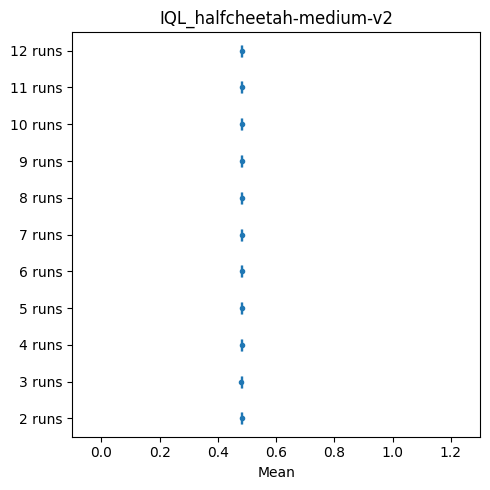

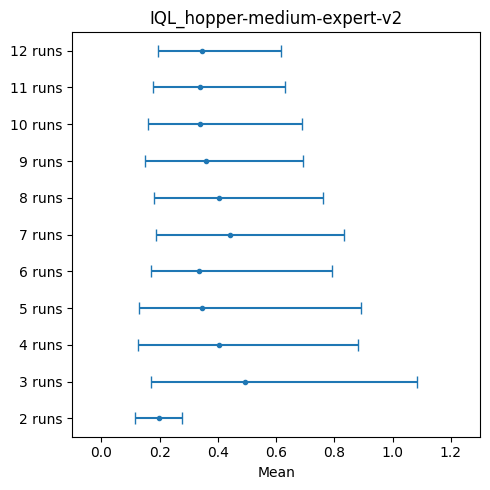

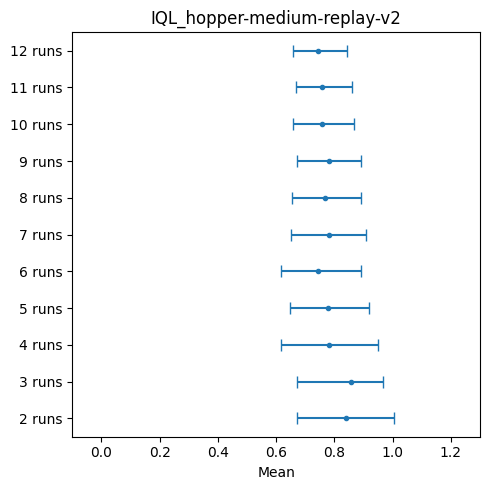

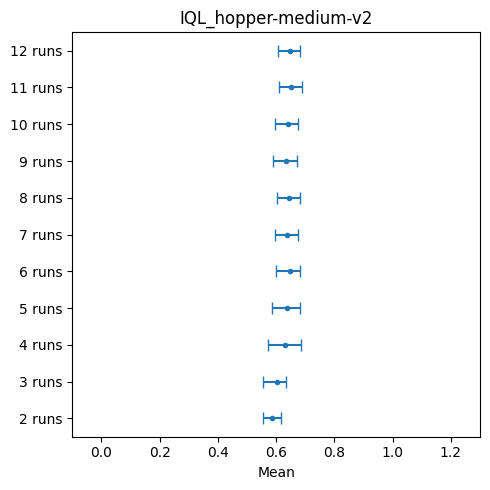

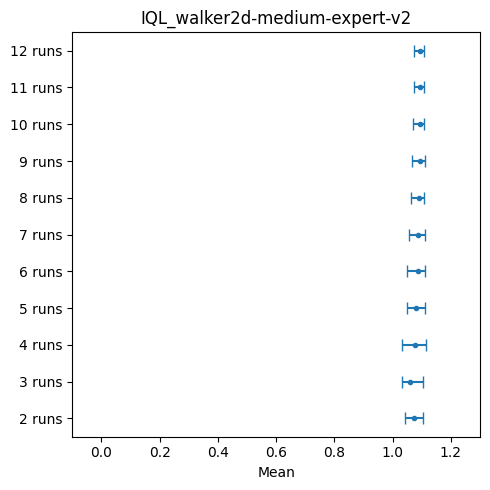

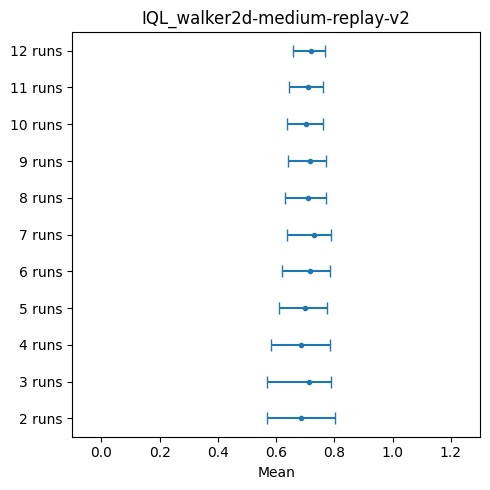

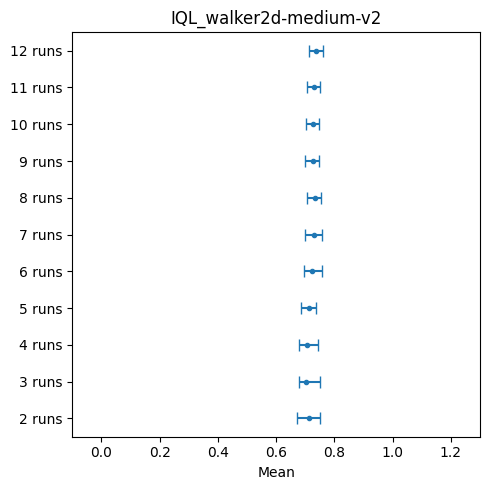

In [ ]:
n = 24

for i in range(n):
    mean = []; low = []; high = []
    array = tasks_algs_scores[i]
    for j in range(2, 13):
        avg_array = np.array(array).reshape(-1, 1000).mean(axis=1)[:j]
        mean.append(np.mean(avg_array))
        #print(path_list[i], len(avg_array), np.mean(avg_array))
        avg_array = (avg_array, )
        res = stats.bootstrap(avg_array, np.mean)
        low.append(res.confidence_interval[0])
        high.append(res.confidence_interval[1])

            # plot_hist(res.bootstrap_distribution, fig, axs, i, j, m)

    mean = np.array(mean); low = np.array(low); high = np.array(high)
    # Plotting
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.errorbar(mean, [f"{j} runs" for j in range(2, 13)], xerr=[mean-low, high-mean], fmt='.', capsize=4)
    ax.set_xlim(-0.1, 1.3)
    # Set labels and title
    ax.set_xlabel('Mean')
    ax.set_title(f'{names_list[i]}')


    # Adjust the spacing between subplots
    plt.tight_layout()
    # Show the plot
    plt.show()



In [ ]:
j

2

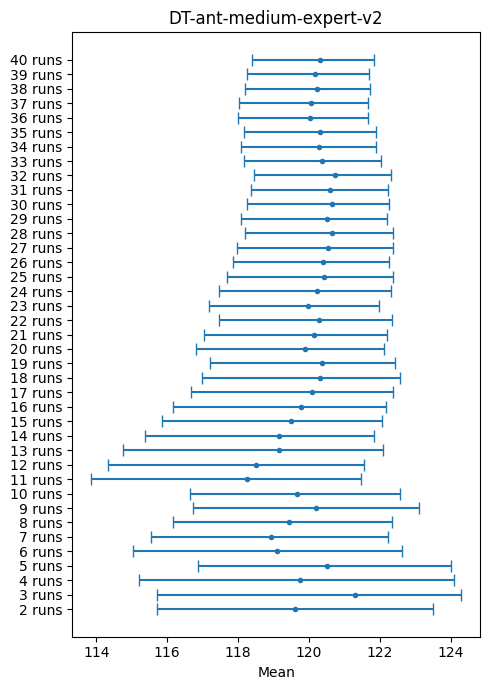

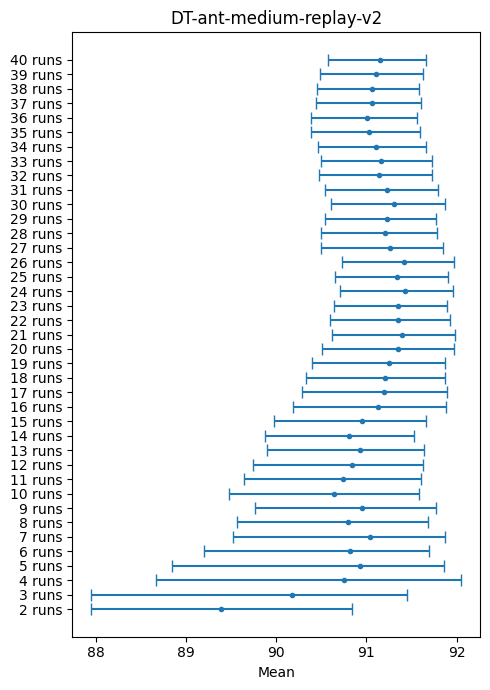

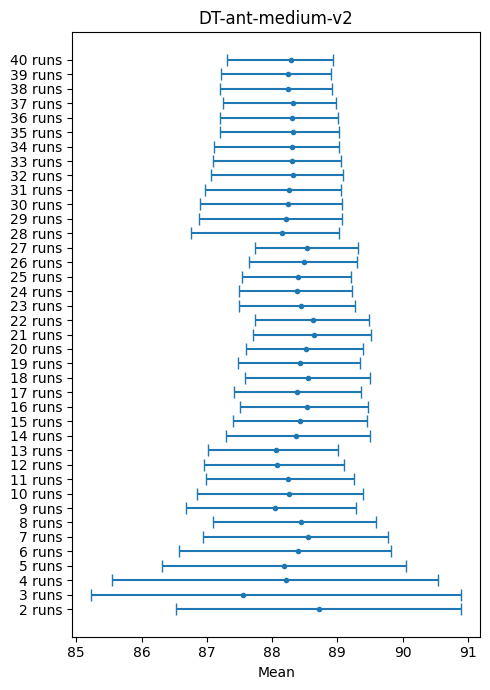

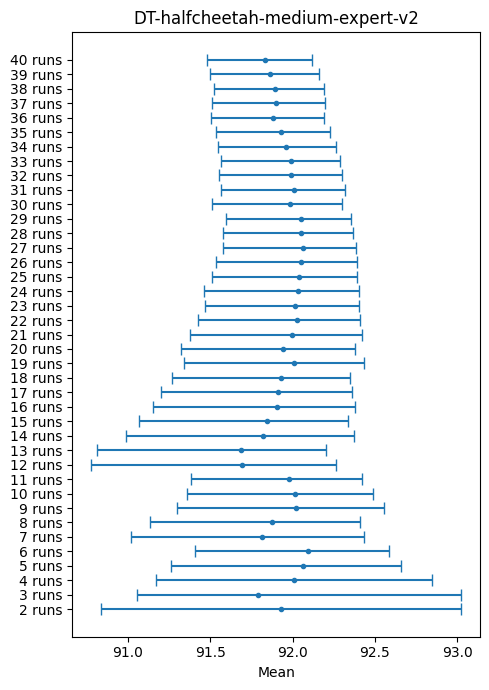

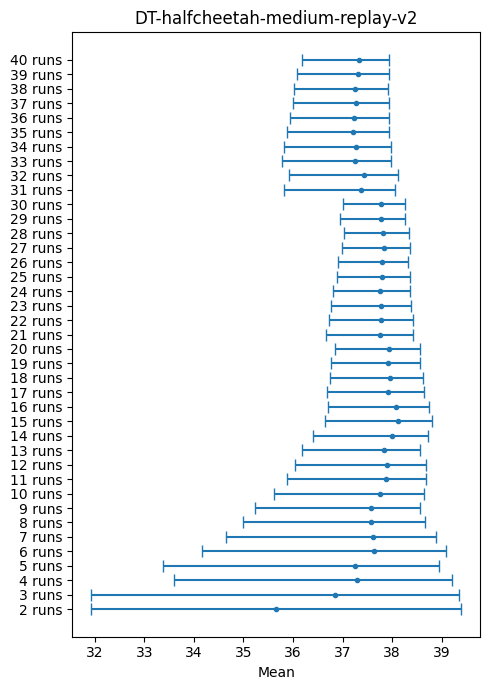

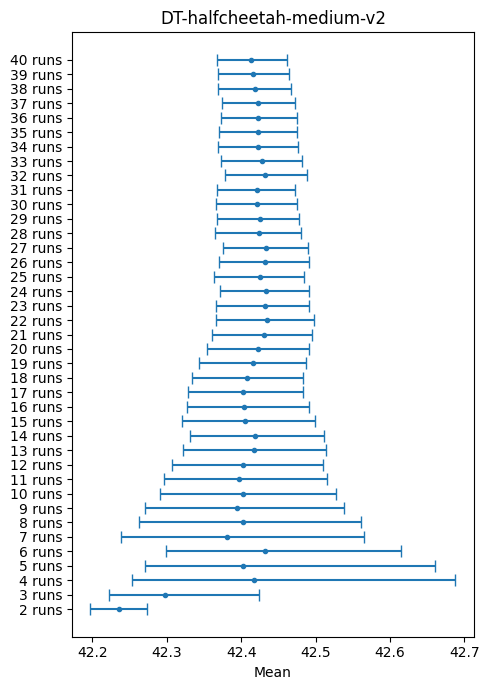

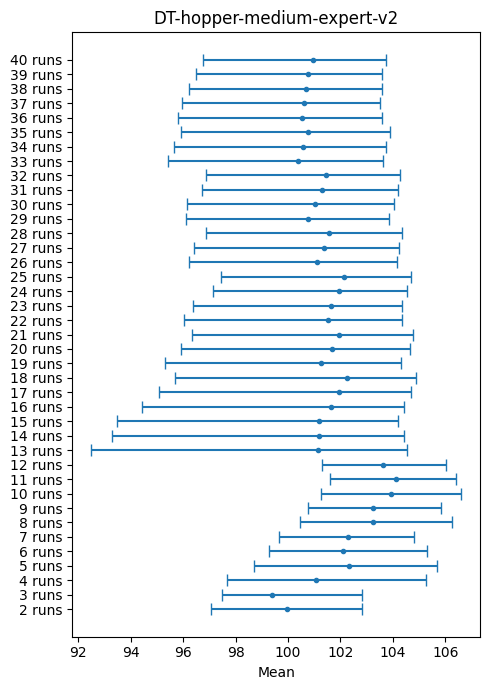

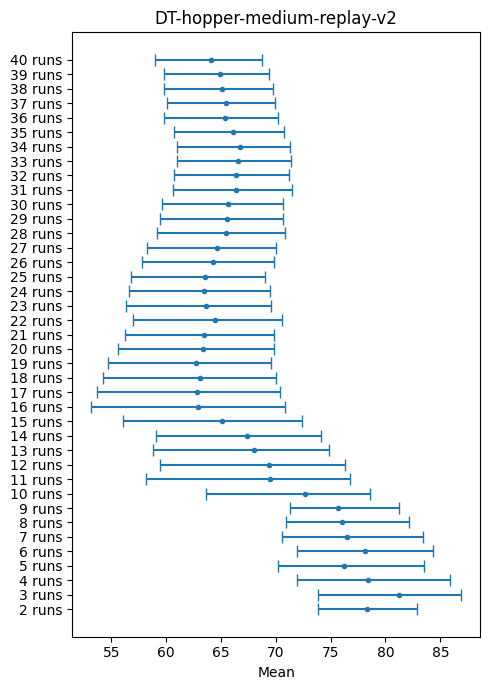

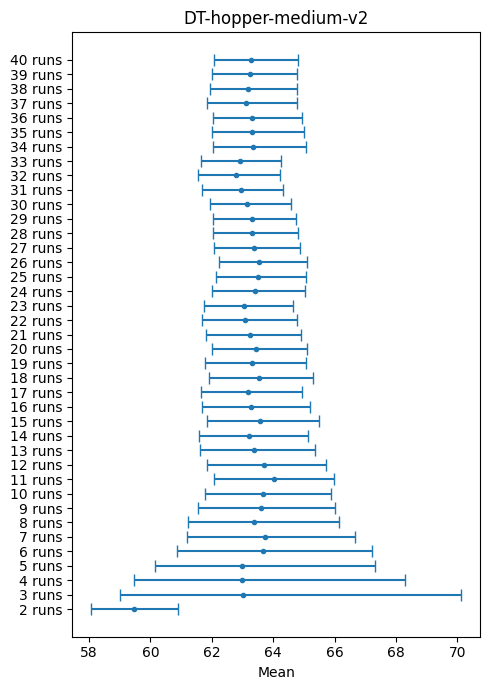

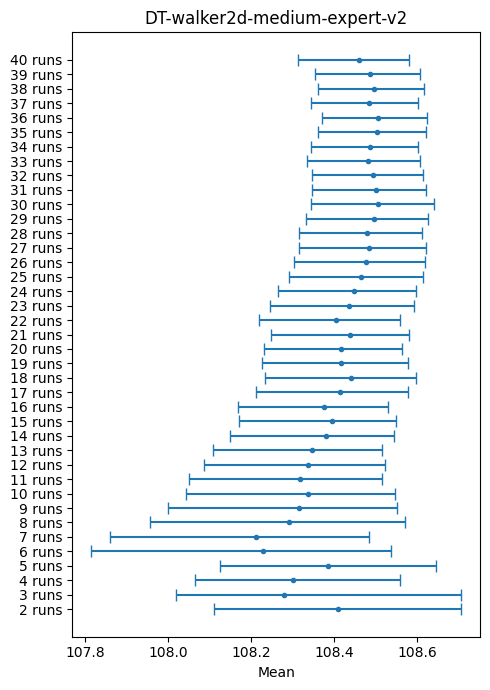

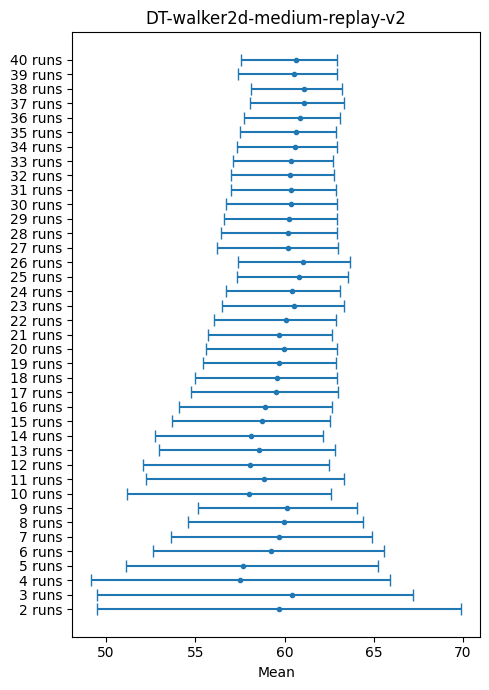

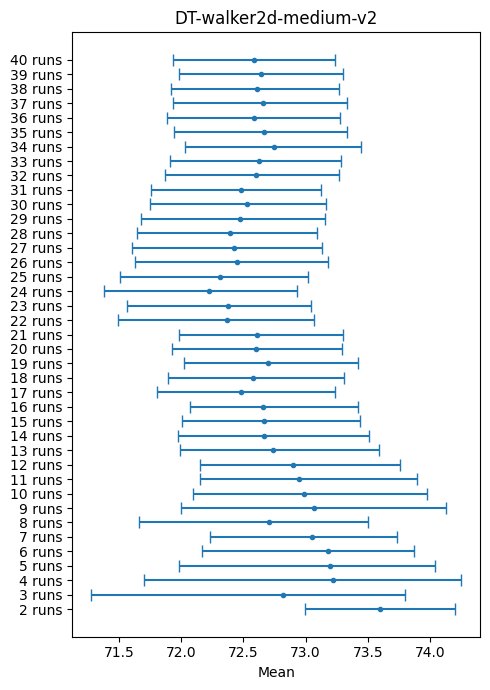

In [ ]:
n = 12
runs = 40
for i in range(n):
    mean = []; low = []; high = []
    array = tasks_algs_scores[i]
    for j in range(2, runs+1):
        avg_array = np.mean(np.array(accs[i].head(j*1000)).reshape(j, 1000), axis=1)
        #avg_array = np.array(array).reshape(-1, 1000).mean(axis=1)[:j]
        mean.append(np.mean(avg_array))
        #print(path_list[i], len(avg_array), np.mean(avg_array))
        avg_array = (avg_array, )
        res = stats.bootstrap(avg_array, np.mean)
        low.append(res.confidence_interval[0])
        high.append(res.confidence_interval[1])

            # plot_hist(res.bootstrap_distribution, fig, axs, i, j, m)

    mean = np.array(mean); low = np.array(low); high = np.array(high)
    # Plotting
    fig, ax = plt.subplots(figsize=(5, 7))
    ax.errorbar(mean, [f"{j} runs" for j in range(2, runs+1)], xerr=[mean-low, high-mean], fmt='.', capsize=4)

    # Set labels and title
    ax.set_xlabel('Mean')
    ax.set_title(f'{names[i]}')


    # Adjust the spacing between subplots
    plt.tight_layout()
    # Show the plot
    plt.show()

In [ ]:
# Create random data for demonstration (replace with your actual data)
num_tasks = 12
data = accs
# Define the number of rows and columns for the grid
grid_rows = 5
grid_cols = 8

# Create 10 grids of histograms
for task_idx in range(num_tasks):
    task_data = (data[task_idx].head(40000)).reshape(40, 1000)

    # Create a new figure for each task
    plt.figure(figsize=(15, 9))  # Adjust the figure size as needed

    for i in range(task_data.shape[0]):
        plt.subplot(grid_rows, grid_cols, i + 1)
        plt.hist(task_data[i], bins=20)  # Adjust the number of bins as needed
        plt.title(f'seed no.{i+1}')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Save or display the figure as needed
    # Replace 'task_figure_<task_idx>.png' with your desired filename
    plt.savefig(f'{names[task_idx]}.png')

    # Close the figure to release resources
    plt.close()

# Show all the saved figures (you can remove this if not needed)
plt.show()

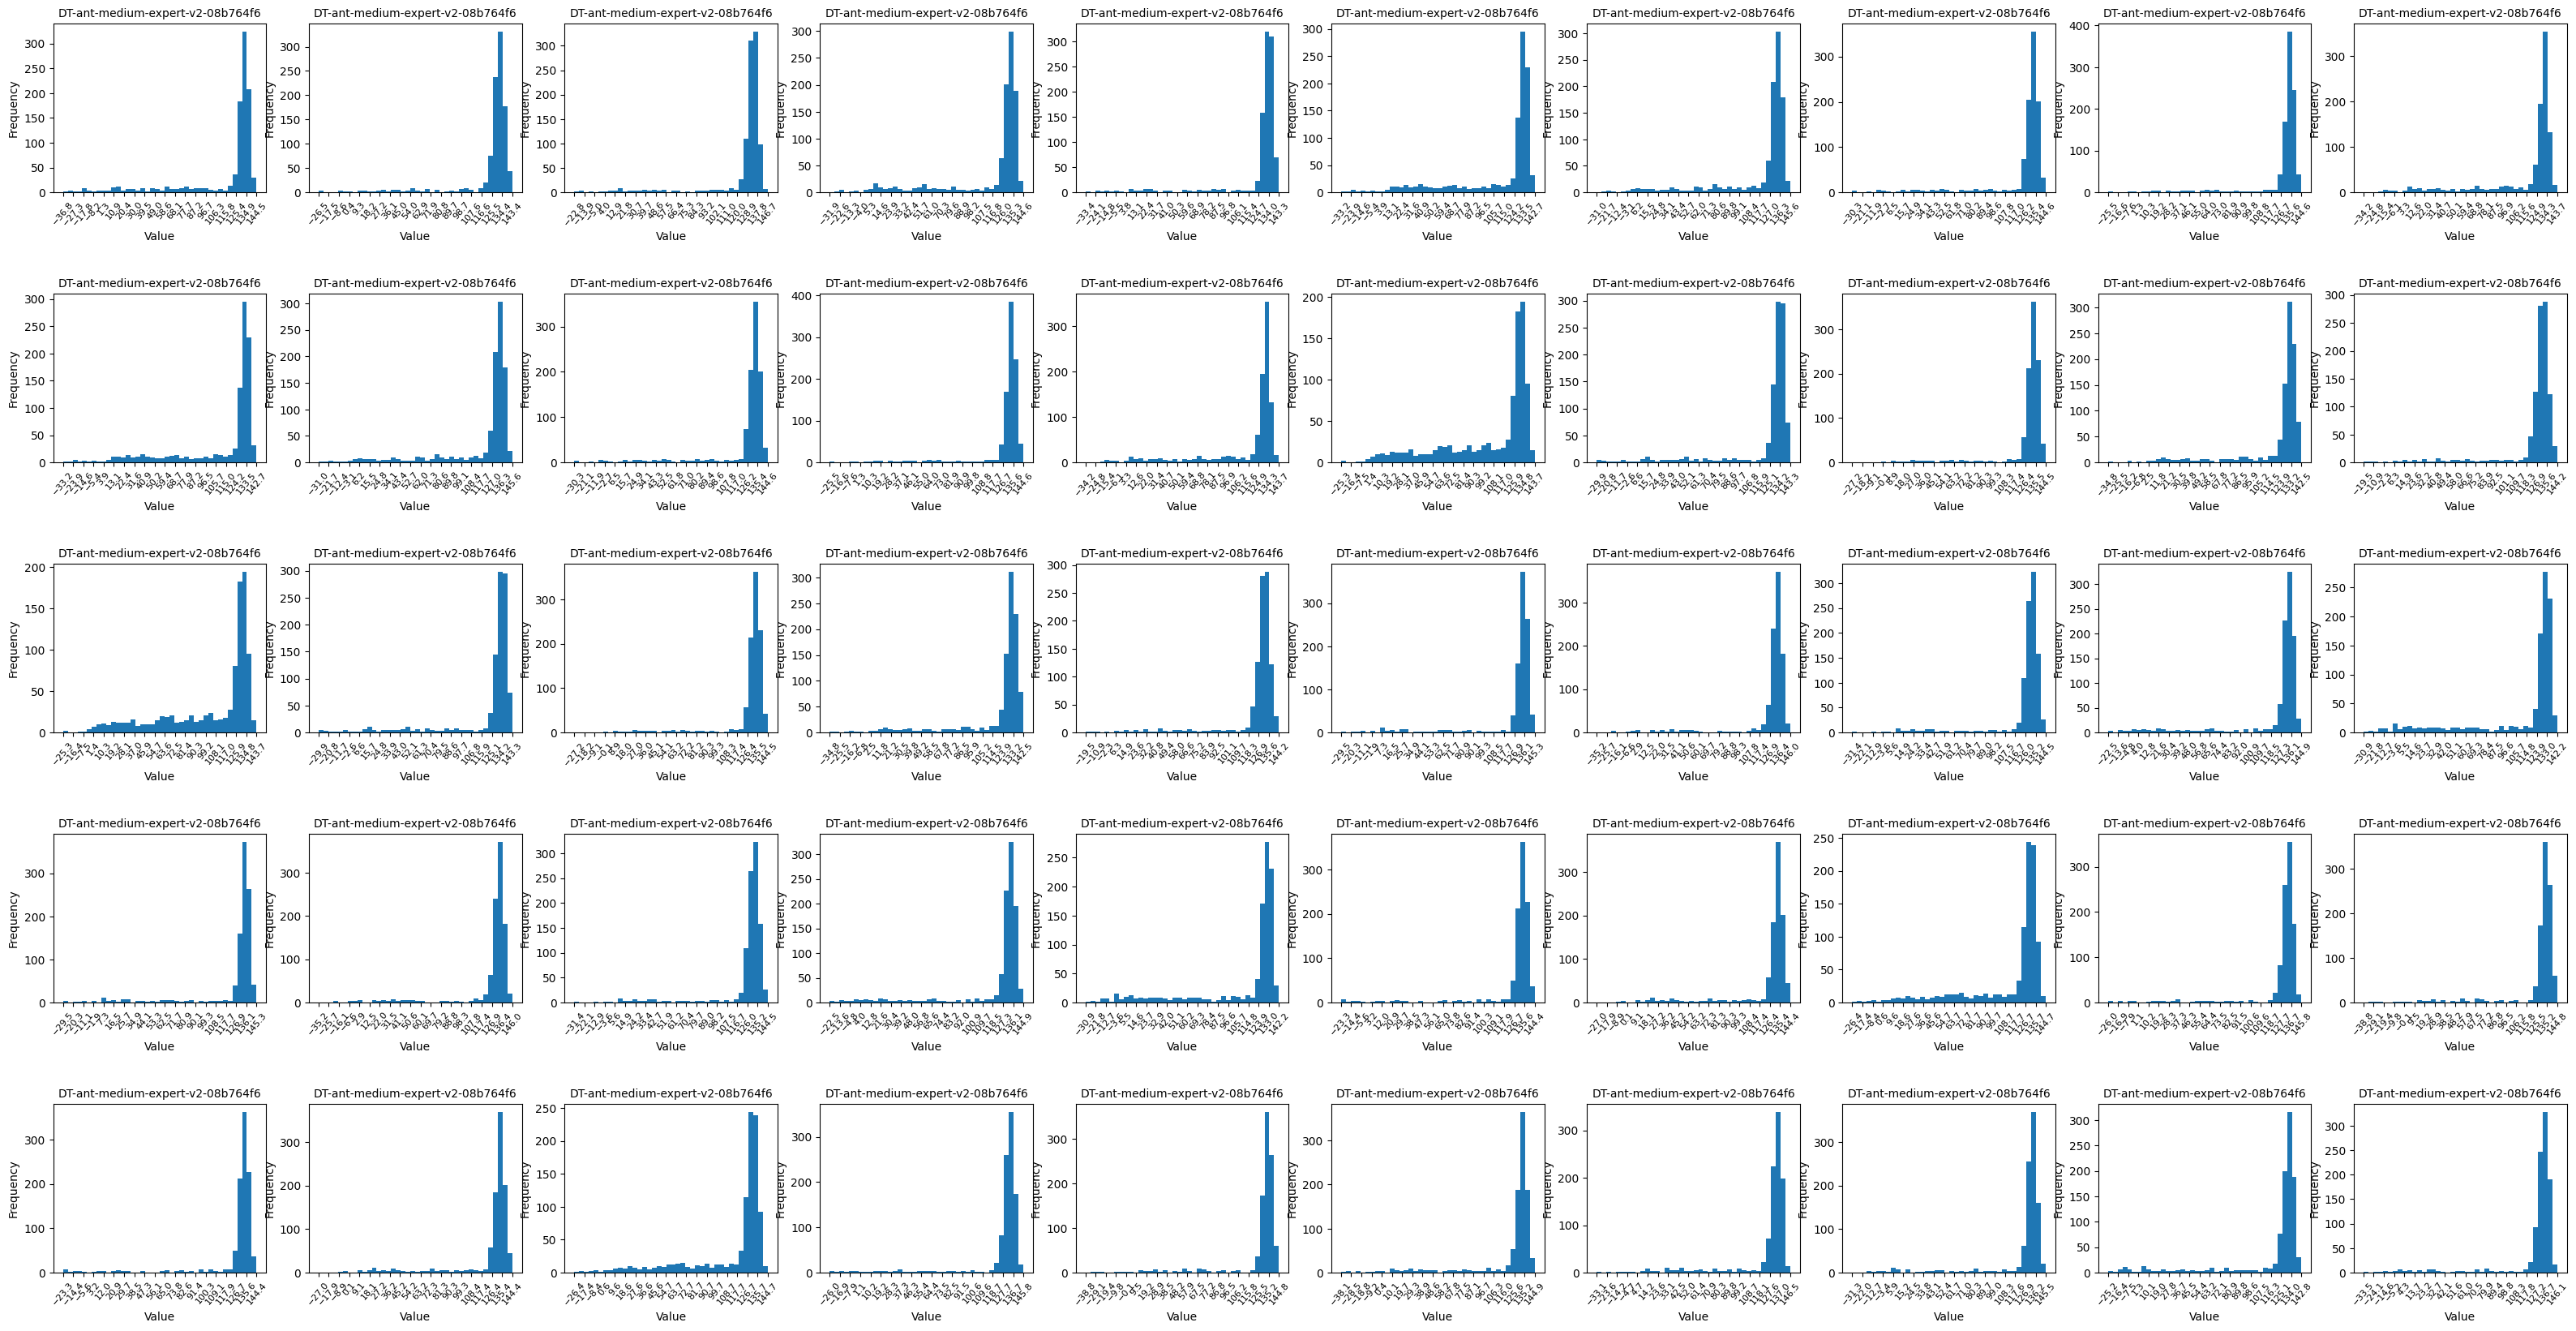

In [ ]:
idx = 0
array = accs[idx].reshape(50, 1000)
m = 5; n = 10
fig, axs = plt.subplots(m, n, figsize=(40, 20), gridspec_kw={'hspace': 0.6})
for i in range(m):
    for j in range(n):
        plot_hist(array[m*i+j], names[idx], fig, axs, i, j, m)

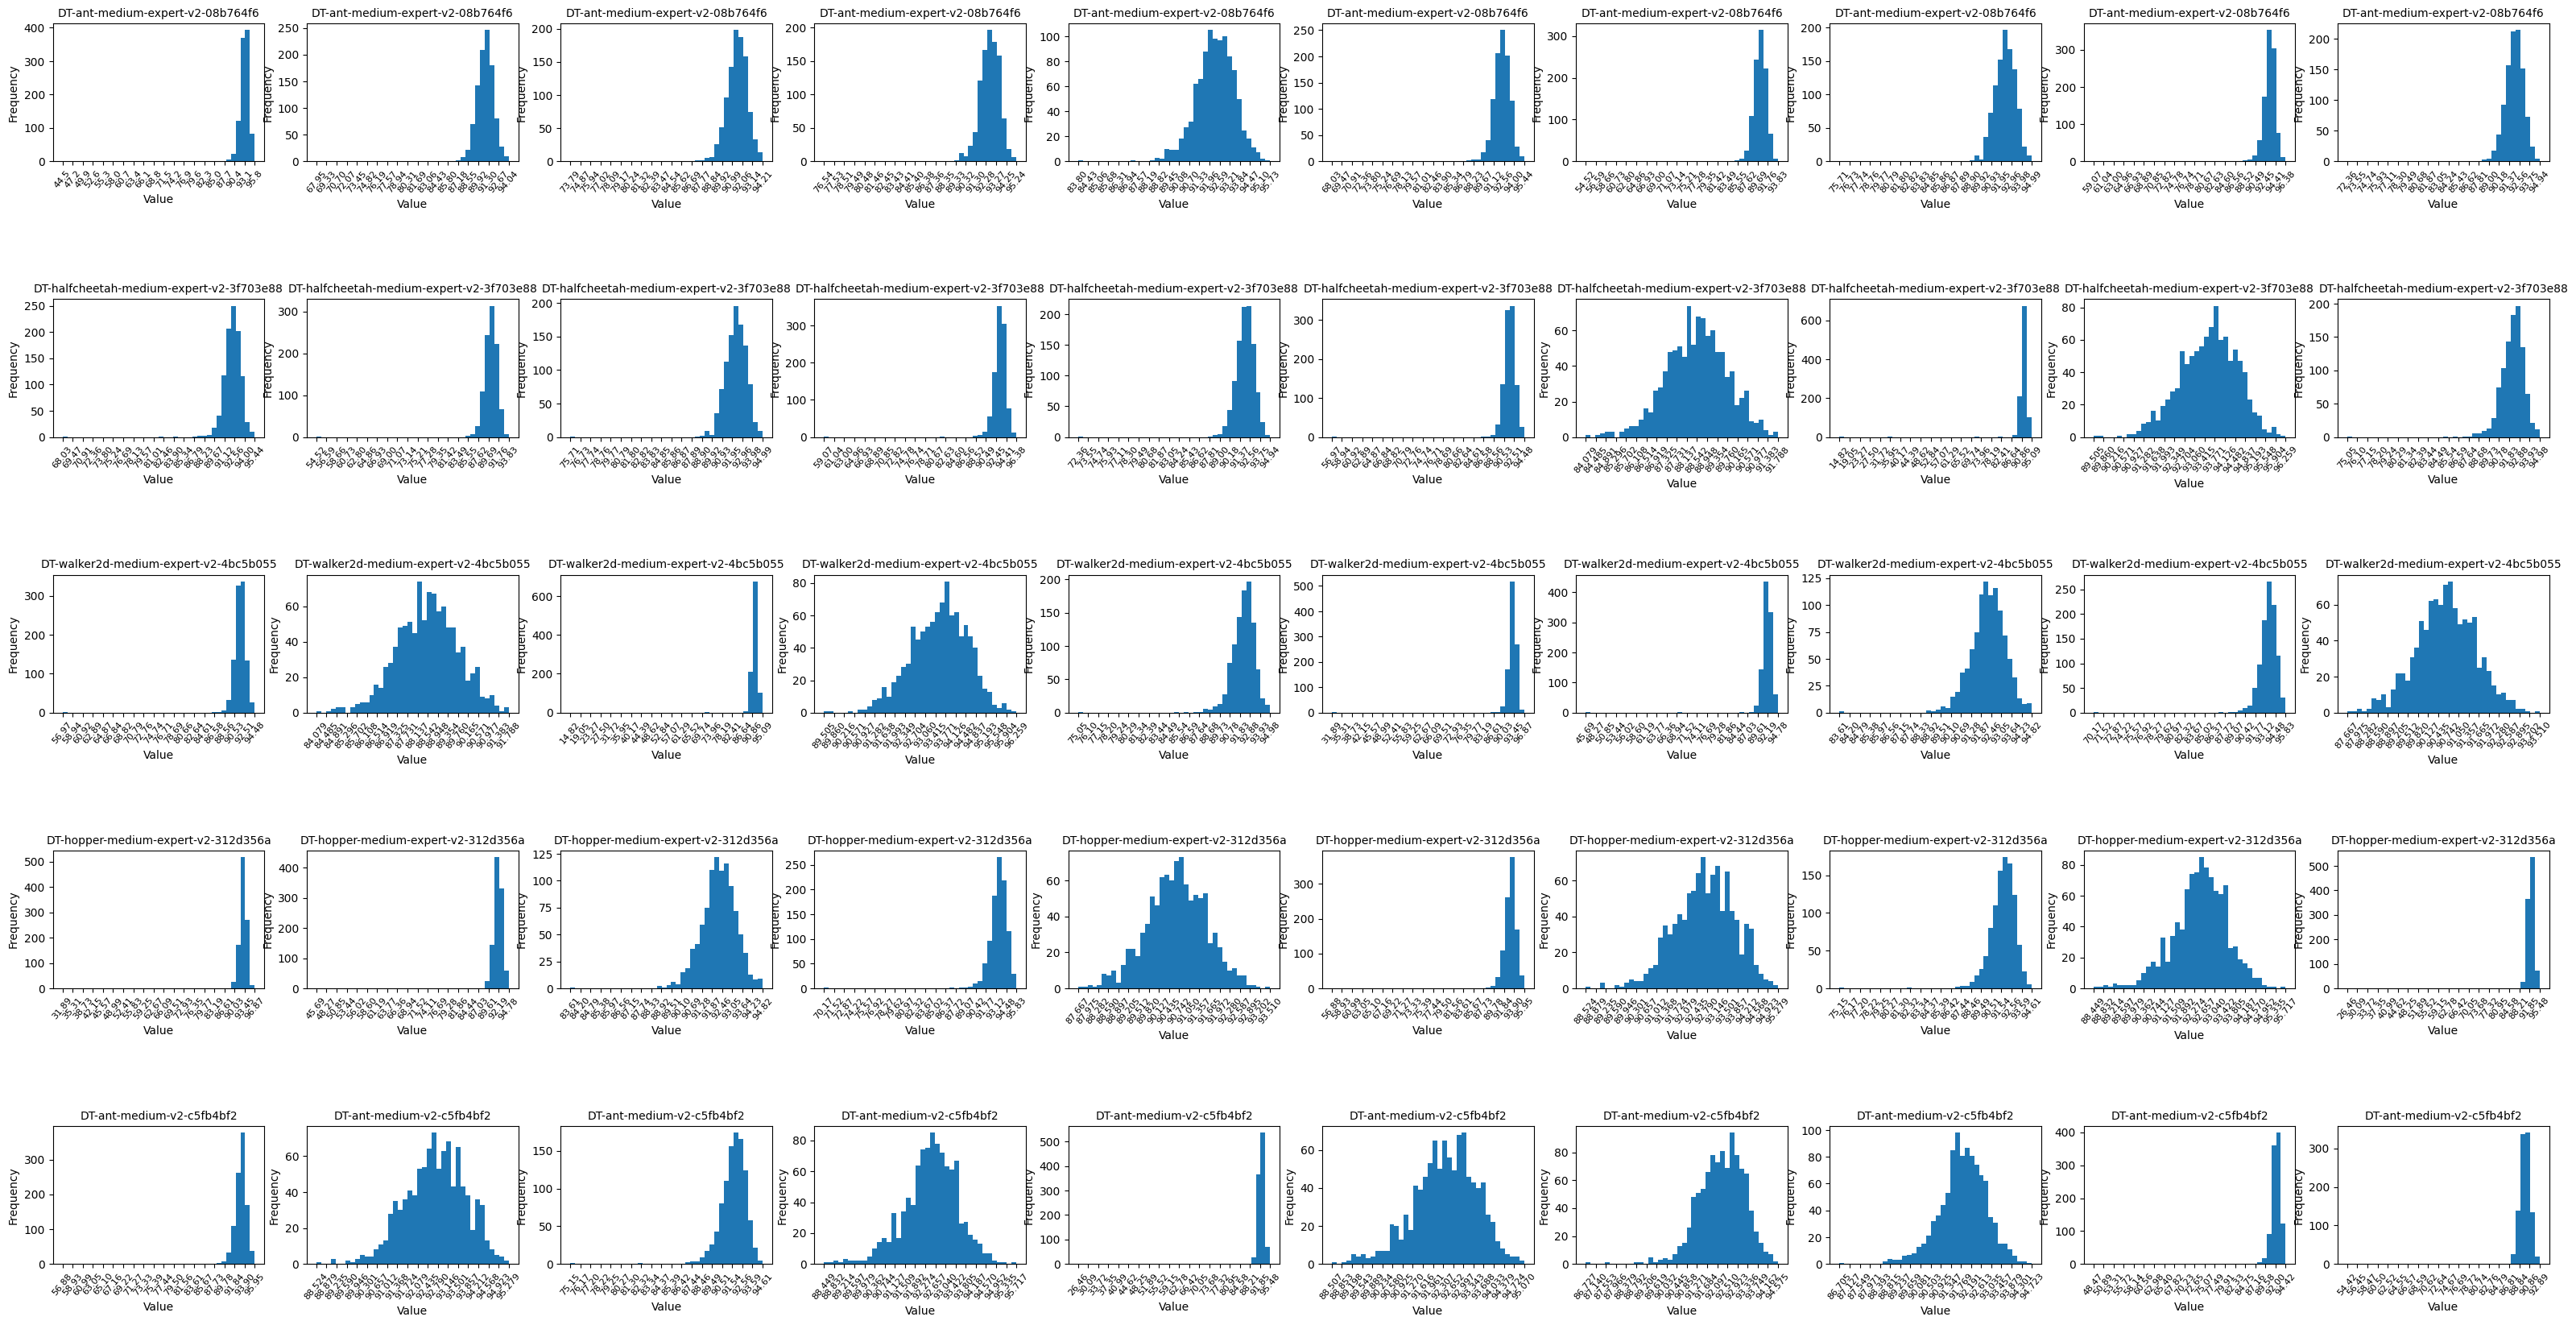

In [ ]:
idx = 1
array = accs[idx].reshape(50, 1000)
m = 5; n = 10
fig, axs = plt.subplots(m, n, figsize=(40, 20), gridspec_kw={'hspace': 1})
for i in range(m):
    for j in range(n):
        plot_hist(array[m*i+j], names[idx], fig, axs, i, j, m)

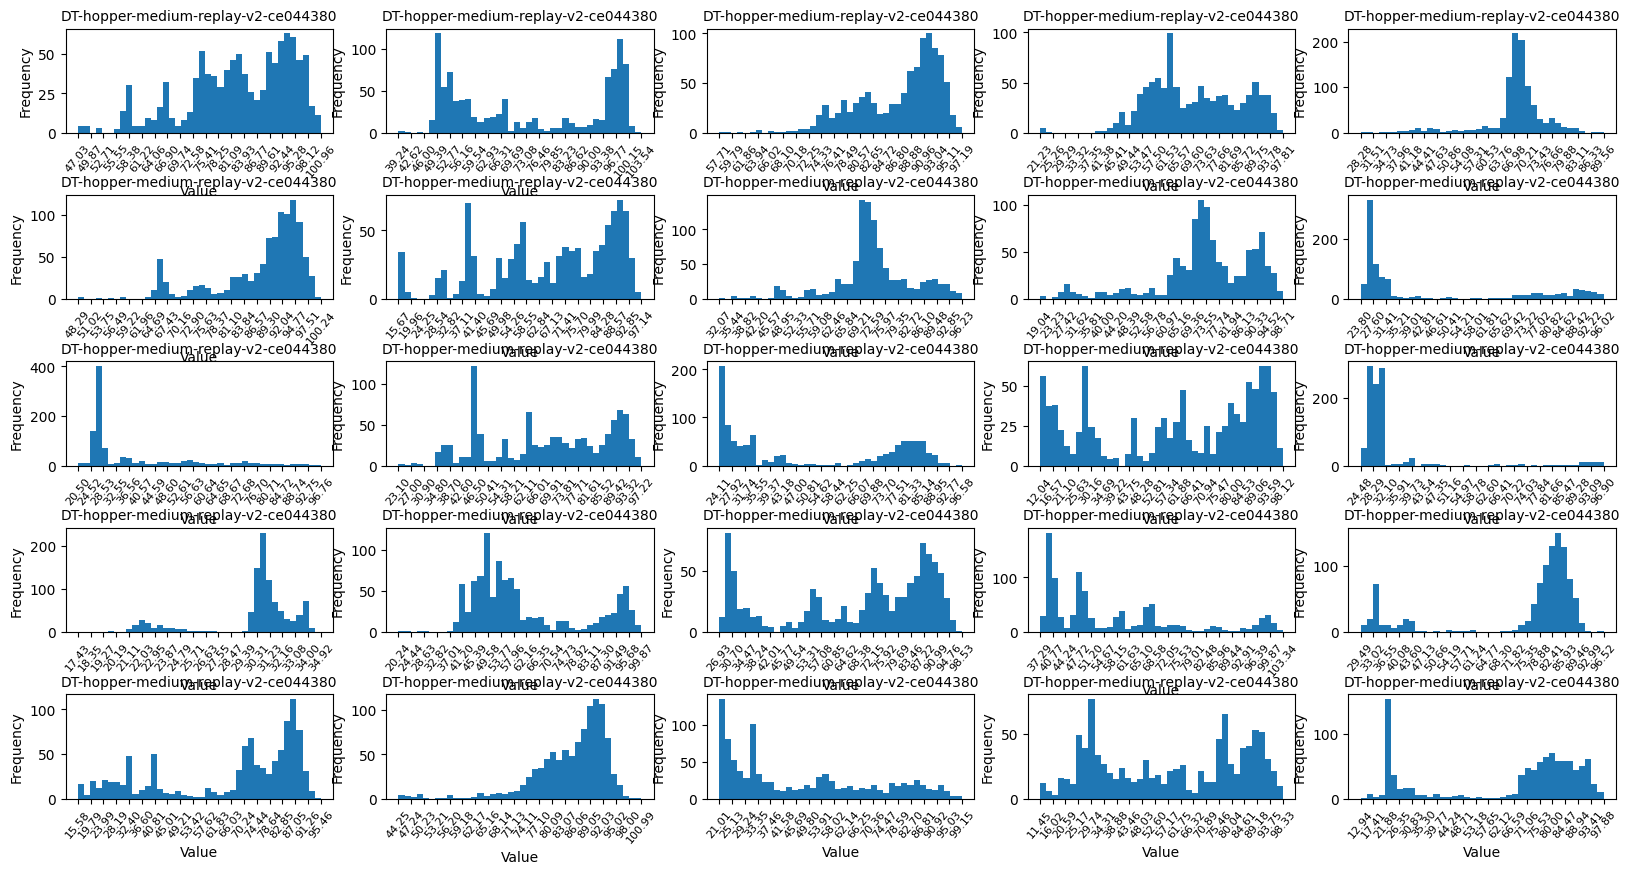

In [ ]:
idx = 11
array = accs[idx].reshape(25, 1000)
m = 5; n = 5
fig, axs = plt.subplots(m, n, figsize=(20, 10), gridspec_kw={'hspace': 0.6})
for i in range(m):
    for j in range(n):
        plot_hist(array[m*i+j], names[idx], fig, axs, i, j, m)

In [ ]:
idx = 8
array = accs[idx].reshape(50, 1000)
m = 5; n = 10
fig, axs = plt.subplots(m, n, figsize=(20, 10), gridspec_kw={'hspace': 0.6})
for i in range(m):
    for j in range(n):
        plot_hist(array[m*i+j], names[idx], fig, axs, i, j, m)

In [ ]:
directory = "/content"  # Replace with your directory path
path_list = []
# Iterate over each file in the directory
for filename in os.listdir(directory):
    # Check if the file is a text file
    if filename.endswith(".txt") and ('rollout' in filename):
        # Get the full path of the file
        file_path = os.path.join('./', filename)
        path_list.append(file_path)

path_list = sorted(path_list)

In [ ]:
array = read_text(path_list[0])

6000 ./CQL_antmaze-umaze-diverse-v2_rollout.txt
0.456
8000 ./CQL_relocate-cloned-v1_rollout.txt
-0.0009638547389341551
34000 ./IQL_antmaze-umaze-diverse-v2_rollout.txt
0.4737941176470588
34000 ./IQL_door-cloned-v1_rollout.txt
0.002745175878655843
42999 ./IQL_hammer-cloned-v1_rollout.txt
0.02634113152205688
33000 ./IQL_relocate-cloned-v1_rollout.txt
-0.00010709602214508367


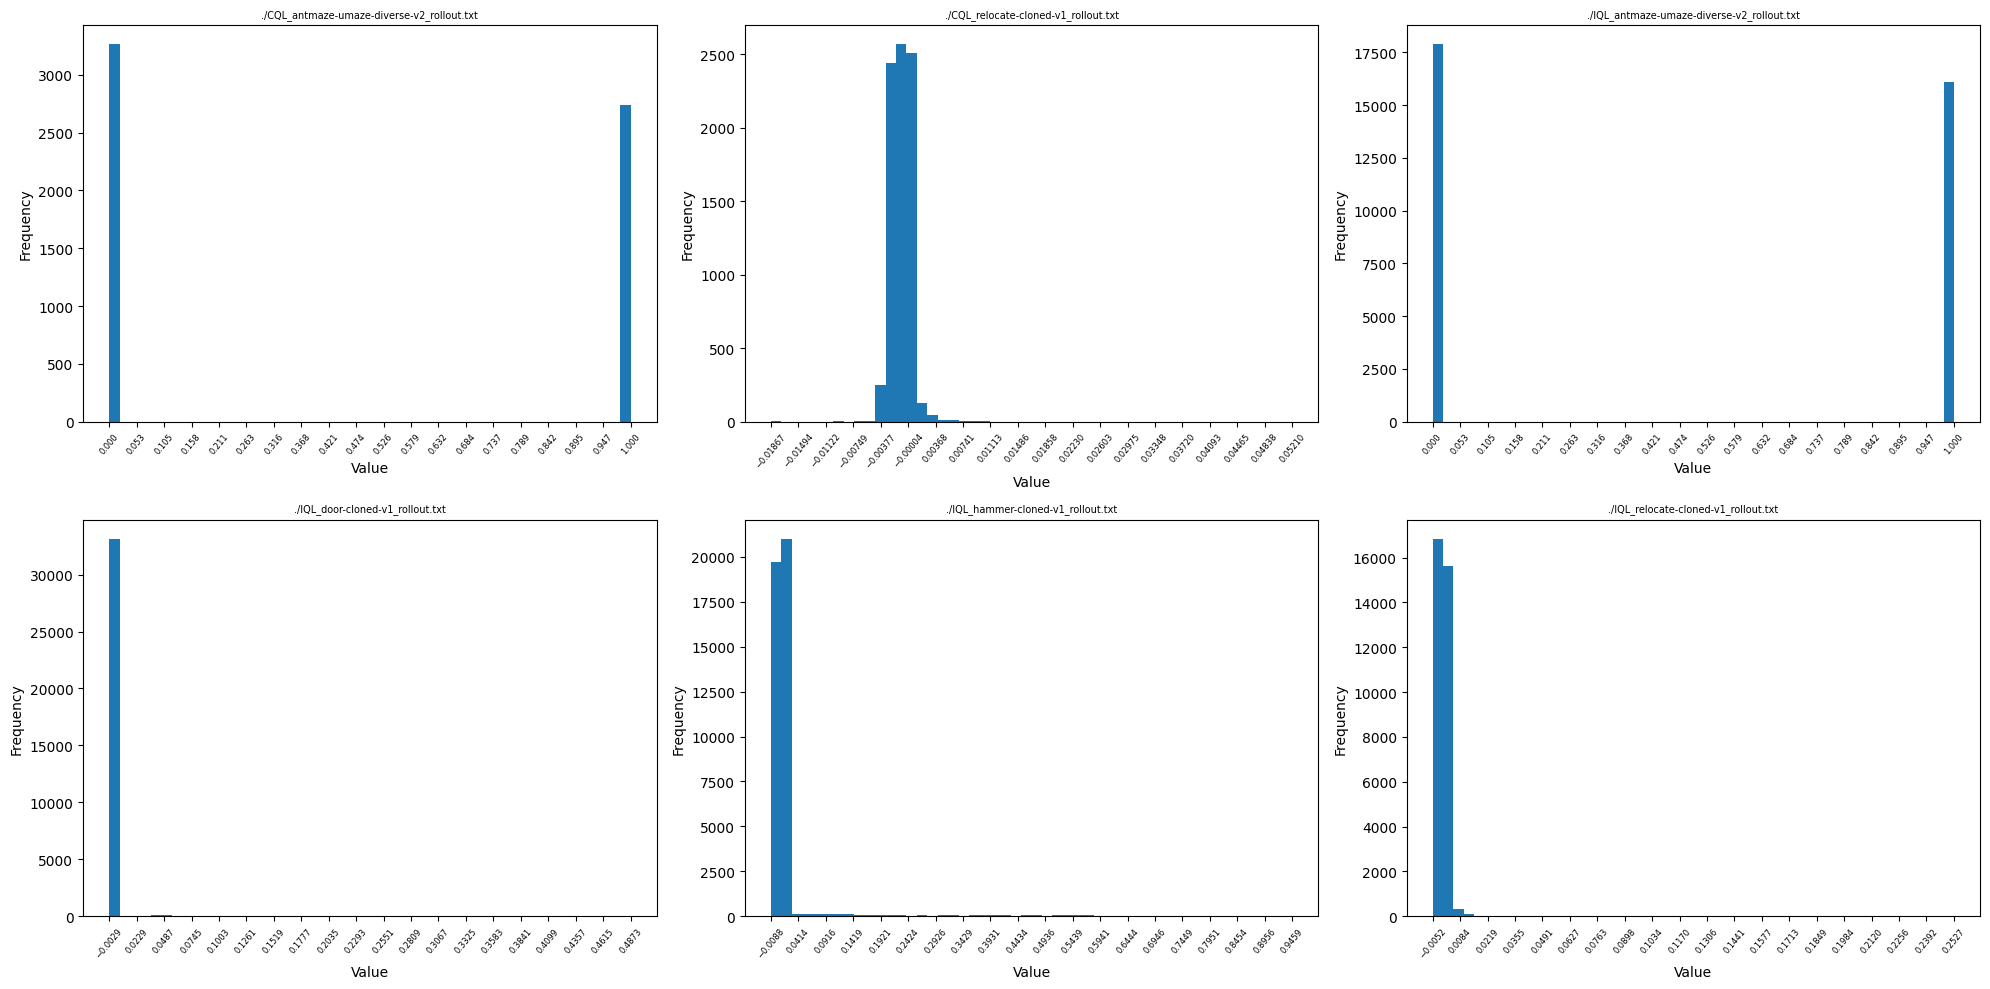

In [ ]:
# array = read_text(file_path)
# plot_hist(array)
n = 2
m = 3
fig, axs = plt.subplots(n, m, figsize=(20, 10))

for i in range(n):
    for j in range(m):
        array = read_text(path_list[m*i+j])
        print(len(array), path_list[m*i+j])
        plot_hist(array, fig, axs, i, j, m)
        print(np.mean(array))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
